In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
sns.set();
from tqdm import tqdm_notebook    #progressbar
tqdm_notebook().pandas(desc="Example Desc")  #progressbar instantiëren voor pandas
from geopy.geocoders import Nominatim

# Hoe goed kunnen participanten hun eigen smartphonegebruik inschatten? 

per participant een verschilscore (subjectief tov objectief) verkrijgen steeds per vraag. 

In [1]:
app_filename = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_appevents(1).csv"
notif_filename = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/data/floor/floor_notifications.csv"

SyntaxError: invalid syntax (<ipython-input-1-ddd3d781d31d>, line 1)

Misschien hier ook een lege datafile inlezen waar de gelinkte data kan uitgeschreven worden. Om dat er niet voor alle participanten data is, is het goed om dit eerst in een lege file te steken en daarna om te zetten naar universiteit_advanced.xlsx

In [3]:
leeg = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/leegvgl.xlsx")

In [5]:
df = pd.read_csv(app_filename, sep=";", parse_dates=['startTime', 'endTime'])
df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

C:\Users\beheerder\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101531 entries, 0 to 101530
Data columns (total 14 columns):
ppn                101531 non-null int64
application        95670 non-null object
battery            95670 non-null float64
data_version       95670 non-null float64
endTime            95670 non-null datetime64[ns]
endTimeMillis      95670 non-null float64
id                 95670 non-null object
latitude           95670 non-null float64
longitude          95670 non-null float64
model              95670 non-null object
notification       95670 non-null object
session            95670 non-null float64
startTime          95670 non-null datetime64[ns]
startTimeMillis    95670 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(1), object(4)
memory usage: 10.8+ MB


In [5]:
df_qualtrics = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/qualtrics/qualtricsoriginal.xlsx')

In [6]:
df_qualtrics.head(5)

,ppn,NAAM,MobileDNA ID,Geslacht,leeftijd,IQ,U_WEEK,MIN_WEEK,G_WEEK,U_WEEKEND,...,SM [0-3],WBniet maand,WB<1 week,WB 1/2week,WB >3,WB [0-3],sleepquality,LS #tot min,wakker #tot min,vermoeidheid
0,1,Marion,8a2f0420-8011-4adc-b128-95a40786d765,V,18,22.0,1,30,90,2,...,0,0.0,0.0,0.0,1.0,3,18,300.0,1140.0,3.0
1,2,Wannes,a0d70d38-201b-49ad-b700-22d84f037555,M,21,21.0,1,45,105,2,...,0,1.0,0.0,0.0,0.0,0,5,435.0,677.0,2.0
2,3,Sander,0870854d-f706-4144-bcb4-0ace2e447425,M,23,22.0,4,0,240,3,...,0,1.0,0.0,0.0,0.0,0,10,480.0,848.0,1.0
3,4,Wouter,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,M,19,29.0,4,30,270,3,...,0,0.0,1.0,0.0,0.0,1,12,390.0,420.0,2.0
4,5,victor,c812a99a-59e4-4c5a-a721-0150d42102c6,M,18,27.0,5,0,300,3,...,0,1.0,0.0,0.0,0.0,0,9,220.0,750.0,2.0


Wat betekent dit checken voor dubbels? 

In [95]:
# Checken voor dubbels
dubbels = pd.concat(g for _, g in df.groupby(["application","startTimeMillis","endTime"]) if len(g) > 1)

In [96]:
dubbels['session'].value_counts().describe()

count     630.000000
mean       10.528571
std        94.139877
min         2.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      2356.000000
Name: session, dtype: float64

In [97]:
df.session.nunique()

28683

In [98]:
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.540000e+12
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.540000e+12
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.540000e+12
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.540000e+12
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.540000e+12


## Aantal dagen gelogd per participant

### voorbereiding

In [99]:
# Omvormen naar datetime object
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

In [100]:
# Datum variabele maken (zonder tijdstip)
df['dag'] = df.startTime.dt.date

Deze kolom straks gebruiken om de dagen te bepalen (week tov weekend)

### aantal dagen gelogd, per participant

In [13]:
# Groeperen op ppn, kijken naar totaal unieke dagen gelogd, per persoon
leeg["log_dag"] = df.groupby('ppn')['dag'].nunique('dag')
leeg["log_dag"].describe()

count    37.000000
mean     14.486486
std       4.787841
min       0.000000
25%      14.000000
50%      17.000000
75%      17.000000
max      17.000000
Name: log_dag, dtype: float64

log_dag nog in dataframe zetten om analyse te doen. 

In [661]:
log_dag = pd.value_counts(leeg['log_dag'].values, sort=False).to_frame()

In [662]:
log_dag = log_dag.reset_index()

In [663]:
log_dag.columns = ["log_dag", "aantal_ppn"]

In [664]:
log_dag["log_dag"]=log_dag["log_dag"].astype(str)


In [665]:
log_dag["prop_ppn"] = log_dag["aantal_ppn"]/37

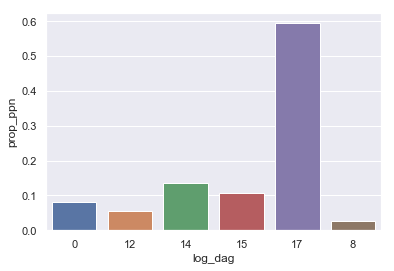

In [666]:
sns.barplot(x="log_dag", y="prop_ppn", data=log_dag)

## Geaggregeerd en op participantniveau

### Gemiddelde tijd gespendeerd op smartphone per dag

In [101]:
# Duur variabele aanmaken: eindtijd - starttijd, /1000 om in seconden
df['duur'] = (df.endTimeMillis - df.startTimeMillis)/1000

In [668]:
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,dag,duur
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.541525e+12,2018-11-06,1.642
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.541526e+12,2018-11-06,114.998
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.541615e+12,2018-11-07,2.026
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.541616e+12,2018-11-07,2.528
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.541628e+12,2018-11-07,22.153


De kolom 'duur' is dus per app event hoe lang dit heeft geduurt in seconden. 

In [669]:
#totale en gemiddelde duur, per ppn, per dag
df.groupby(["ppn","dag"]).duur.agg(['sum', 'mean'])

sum        mean
ppn dag                              
1   2018-11-01  14834.658  126.791949
    2018-11-02   9768.044  111.000500
    2018-11-03   8369.710   77.497315
    2018-11-04   7546.146   71.190057
    2018-11-05   4452.525   55.656563
    2018-11-06   2642.554   35.234053
    2018-11-07   3685.702  147.428080
    2018-11-08   3219.722  134.155083
    2018-11-09  10246.117  103.496131
    2018-11-10   2115.084   64.093455
    2018-11-11   5206.732  226.379652
    2018-11-12   1665.650   79.316667
    2018-11-13   5912.458  147.811450
    2018-11-14   3820.172  112.358000
    2018-11-15   6315.570  170.691081
    2018-11-16    811.445  270.481667
    2018-11-17   1707.841  113.856067
2   2018-11-01   5730.232   37.948556
    2018-11-02  11244.505   59.181605
    2018-11-03   6201.673   43.983496
    2018-11-04  11342.246   42.963053
    2018-11-05  10861.004   34.370266
    2018-11-06  17939.014   34.900805
    2018-11-07   6971.225   32.424302
    2018-11-08   9767.197   26.981207
    2018-11-09  19081.711   40.860195
    2018-11-10  20769.368   37.900307
    2018-11-11  23697.232   66.941333
    2018-11-12   9667.299   34.039785
    2018-11-13   8873.986   23.663963
...                   ...         ...
35  2018-11-13   7225.784   52.360754
    2018-11-14   6405.906   72.794386
    2018-11-15   5659.154   58.949521
    2018-11-16   7370.721   64.655447
    2018-11-17   2465.266   27.090835
36  2018-11-01   7657.309   87.014875
    2018-11-02   3560.190   63.574821
    2018-11-03   5564.449   70.436063
    2018-11-04   7395.044  132.054357
    2018-11-05  17784.802   65.869637
    2018-11-06   9132.341   59.688503
    2018-11-07  14713.628   69.403906
    2018-11-08  21823.262   49.711303
    2018-11-09  17330.802   45.848683
    2018-11-10  10845.499   61.622153
    2018-11-11  25473.420   73.199483
    2018-11-12  29468.712   55.184854
    2018-11-13  18750.846   74.114016
    2018-11-14  15570.236   71.423101
    2018-11-15  25159.256   72.089559
    2018-11-16  29415.770   82.861324
    2018-11-17  19512.746   55.120751
38  2018-11-10   1880.601   22.388107
    2018-11-11   9509.122   65.580152
    2018-11-12  10169.155   55.874478
    2018-11-13  14894.130   50.148586
    2018-11-14   5961.128   33.117378
    2018-11-15  10885.021   66.372079
    2018-11-16  10050.811   63.212648
    2018-11-17   4076.666   33.691455

[536 rows x 2 columns]

In [670]:
# Gemiddelde tijd (sec) over dagen heen, per participant
leeg["perdag_sec"] = df.groupby(['ppn','dag'])['duur'].sum().groupby('ppn').mean()

In [671]:
#gemiddelde tijd (sec) over de participanten heen, per dag

In [672]:
df.groupby(['ppn','dag'])['duur'].sum().groupby('dag').mean()

dag
2018-11-01     8325.997760
2018-11-02    10405.883920
2018-11-03     8167.601000
2018-11-04    10056.989242
2018-11-05    12437.250061
2018-11-06    11464.839242
2018-11-07    10663.702906
2018-11-08    10111.153875
2018-11-09    11539.611188
2018-11-10     9347.123091
2018-11-11    11506.777824
2018-11-12    11071.663441
2018-11-13    11789.259939
2018-11-14    10165.478000
2018-11-15    11361.957344
2018-11-16    11002.035688
2018-11-17     9210.435194
Name: duur, dtype: float64

Dit kan straks al een indicatie zijn voor week tov weekend. 

In [379]:
# Gemiddelde tijd (sec) per dag, geaggregeerd over de participanten heen
df.groupby(['ppn','dag'])['duur'].sum().mean()

10465.193573012944

### Uren dagelijks op smartphone

In [102]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['dag'] = df.endTime.dt.date

In [673]:
pp = df.groupby(['ppn','dag'])['duur'].sum()/3600

###### per participant and per dag: hoeveel uren op de smartphone. 

In [381]:
pp

ppn  dag       
1    2018-11-01    2.922790
     2018-11-02    3.911294
     2018-11-03    2.324919
     2018-11-04    2.096152
     2018-11-05    1.236813
     2018-11-06    0.734043
     2018-11-07    1.023806
     2018-11-08    0.894367
     2018-11-09    2.846144
     2018-11-10    0.587523
     2018-11-11    1.264329
     2018-11-12    0.644666
     2018-11-13    1.642349
     2018-11-14    1.061159
     2018-11-15    1.247792
     2018-11-16    0.731934
     2018-11-17    0.459874
     2018-11-18    0.014526
2    2018-11-01    1.407791
     2018-11-02    3.307413
     2018-11-03    1.722687
     2018-11-04    3.150624
     2018-11-05    3.016946
     2018-11-06    4.983059
     2018-11-07    1.936451
     2018-11-08    2.713110
     2018-11-09    5.300475
     2018-11-10    5.734090
     2018-11-11    6.617743
     2018-11-12    2.685361
                     ...   
35   2018-11-15    1.571987
     2018-11-16    2.047422
     2018-11-17    0.684796
36   2018-11-01    2.127030
    

###### Over de participanten heen: hoeveel uren per dag gemiddeld op smartphone

In [382]:
pp.groupby('dag').mean()

dag
2018-11-01    2.219551
2018-11-02    2.983100
2018-11-03    2.239948
2018-11-04    2.772636
2018-11-05    3.414935
2018-11-06    3.271184
2018-11-07    2.830159
2018-11-08    2.935445
2018-11-09    3.130262
2018-11-10    2.639906
2018-11-11    3.167719
2018-11-12    3.130570
2018-11-13    3.237645
2018-11-14    2.859589
2018-11-15    3.113087
2018-11-16    3.060067
2018-11-17    2.576897
2018-11-18    0.192498
Name: duur, dtype: float64

###### over de dagen heen per participant: hoeveel uren per dag gemiddeld op smartphone

In [674]:
leeg['meanUdag'] = pp.groupby('ppn').mean()

In [675]:
meanUdag = leeg['meanUdag'].to_frame()

In [676]:
meanUdag=meanUdag.reset_index()

In [677]:
meanUdag["meanUdag"].describe()

count    34.000000
mean      2.828943
std       1.785702
min       0.219189
25%       1.409782
50%       2.766252
75%       3.805304
max       7.290531
Name: meanUdag, dtype: float64

In [678]:
meanUdag = meanUdag[: -3]

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


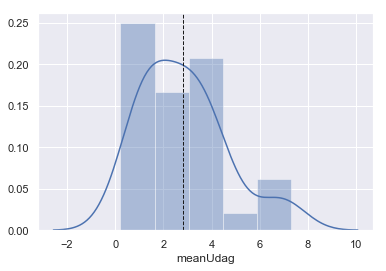

In [48]:
sns.distplot(meanUdag["meanUdag"])
plt.axvline(meanUdag["meanUdag"].mean(), color='k', linestyle='dashed', linewidth=1)

Dit wordt dus een eerste kolom voor de output datafile: dit geeft aan hoeveel uren ze op in het totaal (zonder onderscheid tussen week en weekend) hun smartphone gebruikt hebben. 

Maar eigenlijk hebben wij de minuten bevraagd hiervoor: dus gedeeld door /60 ipv /3600

###### over de dagen heen per participant: hoeveel minuten per dag gemiddeld op smartphone

In [680]:
ppmin = df.groupby(['ppn','dag'])['duur'].sum()/60

In [681]:
leeg["meanMindag"] = ppmin.groupby('ppn').mean()

Dit wordt een belangrijke kolom. 

### Gemiddelde aantal app gebruik per dag 

In [682]:
# Gemiddeld aantal verschillende apps (nunique), per dag, per participant
leeg["meanAppsdag"] = df.groupby(['ppn', 'dag'])['application'].nunique().groupby('ppn').mean()

In [683]:
meanAppsdag = leeg["meanAppsdag"]

In [684]:
meanAppsdag = meanAppsdag.to_frame()

In [685]:
meanAppsdag = meanAppsdag[:-3]

In [686]:
meanAppsdag = meanAppsdag.reset_index()

In [687]:
meanAppsdag["meanAppsdag"].describe()

count    34.000000
mean     23.196251
std       7.713962
min       9.214286
25%      17.868627
50%      23.388889
75%      27.588235
max      41.000000
Name: meanAppsdag, dtype: float64

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


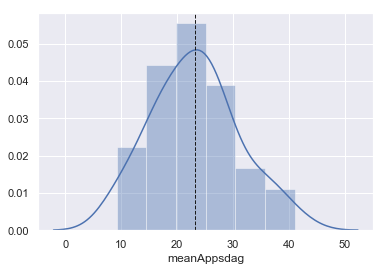

In [70]:
sns.distplot(meanAppsdag["meanAppsdag"])
plt.axvline(meanAppsdag["meanAppsdag"].mean(), color='k', linestyle='dashed', linewidth=1)

In [688]:
# Gemiddeld aantal verschillende apps, per dag, geaggregeerd over de participanten
df.groupby(['dag', 'ppn'])['application'].nunique().mean()

23.42698706099815

### Top 10 vaakste/langste

##### KLOPT IETS NIET!

Dit straks herhalen per participant en in de juiste categorieën. 

In [388]:
# Top 10 vaakste (in aantal appevents?)
df['application'].value_counts()[:10]

com.facebook.orca             11324
com.facebook.katana            9343
com.android.systemui           8989
com.instagram.android          6559
com.snapchat.android           4714
com.android.mms                4527
com.whatsapp                   4239
com.android.chrome             4189
com.spotify.music              3162
com.google.android.youtube     2096
Name: application, dtype: int64

In [71]:
# Top 10 langste (in s)
langsteApps = df.groupby(['application'])['duur']\
    .count() \
    .reset_index(name='duur') \
    .sort_values(by='duur', ascending=False)
langsteApps.reset_index()[:10]

,index,application,duur
0,145,com.facebook.orca,11324
1,144,com.facebook.katana,9343
2,81,com.android.systemui,8989
3,219,com.instagram.android,6559
4,382,com.snapchat.android,4714
5,70,com.android.mms,4527
6,443,com.whatsapp,4239
7,56,com.android.chrome,4189
8,401,com.spotify.music,3162
9,187,com.google.android.youtube,2096


Katana Is the Facebook app and Orca the Facebook Messenger.

per persoon kunnen we hier nog top drie van meest gebruikte apps uithalen. 

<b>Ik krijg hier dezelfde waarde als hierboven => app_events tov de langste. Dat is niet juist? </b>

In [72]:
# 1. Algemeen gemiddelde tijd op gsm per dag:
# Gemiddelde tijd (sec) per dag, geaggregeerd, omgevormd naar hh:mm:ss
sec = df.groupby(['ppn','dag'])['duur'].sum().mean()
# sec = 5697.430628361863

N = int(sec)
min = 60
hour = 60 * 60
day = 60 * 60 * 24

DAY = N // day
HOUR = (N - (DAY)) // hour
MINUT = (N - (DAY + (HOUR * hour))) // min
SECONDS = N - (DAY + (HOUR * hour) + (MINUT * min))

print('{}:{}:{}'.format(HOUR, MINUT, SECONDS))

2:54:25


## Smartphone gebruik/dag ('week' tov 'weekend')

### Stap 1: welke data werd er gelogd?

In [120]:
df['dag'].unique()

array([datetime.date(2018, 11, 6), datetime.date(2018, 11, 7),
       datetime.date(2018, 11, 8), datetime.date(2018, 11, 9),
       datetime.date(2018, 11, 4), datetime.date(2018, 11, 3),
       datetime.date(2018, 11, 5), datetime.date(2018, 11, 1),
       datetime.date(2018, 11, 2), datetime.date(2018, 11, 14),
       datetime.date(2018, 11, 11), datetime.date(2018, 11, 15),
       datetime.date(2018, 11, 12), datetime.date(2018, 11, 13),
       datetime.date(2018, 11, 10), datetime.date(2018, 11, 17),
       datetime.date(2018, 11, 16), datetime.date(2018, 11, 18), nan],
      dtype=object)

<b>WEEK</b>
2018-11-02
2018-11-05
2018-11-06
2018-11-07
2018-11-08
2018-11-09
2018-11-12
2018-11-13
2018-11-14
2018-11-15
2018-11-16
2018-11-19<br>
<b>WEEKEND</b>
2018-11-03 
2018-11-04
2018-11-10 
2018-11-11
2018-11-17 
2018-11-18

### Stap 2: data categoriseren als "WEEK" en "WEEKEND". 

In [103]:
df['day'] = df.startTime.dt.day

Dit wordt nu volledig gebasseerd op het "nummer" van de dag in november om dat deze allemaal uniek zijn. 

In [104]:
df['moment'] = np.where((df.day == 3)|(df.day == 4)|(df.day==10)|(df.day==11)|(df.day==17)|(df.day==18), 'WEEKEND', 'WEEK')

Er zijn minder dagen die behoren tot het weekend dan tot de week; dus door de dagen van het weekend te specifiëren, is de "overschot" dan dagen in de week. 

In [691]:
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,dag,duur,day,moment
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.541525e+12,2018-11-06,1.642,6.0,WEEK
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.541526e+12,2018-11-06,114.998,6.0,WEEK
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.541615e+12,2018-11-07,2.026,7.0,WEEK
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.541616e+12,2018-11-07,2.528,7.0,WEEK
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.541628e+12,2018-11-07,22.153,7.0,WEEK


### Stap 3: per participant aantal minuten per dag (week <=> weekend)

Hoeveel minuten hebben ze op smartphone gezeten <b> in totaal </b> tijdens week en weekend => wordt geen rekening gehouden met het verschil in dagen tussen week en weekend. 

In [692]:
df.groupby(['ppn','moment'])['duur'].sum()/60

ppn  moment 
1    WEEK       1122.910283
     WEEKEND     415.758550
2    WEEK       1703.279917
     WEEKEND    1033.508650
3    WEEK       2175.584633
     WEEKEND     897.762283
4    WEEK       1627.700350
     WEEKEND     571.576750
5    WEEK       3134.186983
     WEEKEND    1179.858983
6    WEEK       2312.986100
     WEEKEND    1225.588883
8    WEEK       2778.884350
     WEEKEND     996.983833
9    WEEK       1983.470667
     WEEKEND     549.450917
10   WEEK       3220.216233
     WEEKEND     696.373883
11   WEEK        961.920333
     WEEKEND     458.873383
12   WEEK       2533.853850
     WEEKEND     960.607983
13   WEEK       2324.866567
     WEEKEND     780.837483
14   WEEK       5210.977433
     WEEKEND    2225.364583
15   WEEK       4815.849867
     WEEKEND    2116.349100
16   WEEK       3506.421533
     WEEKEND    1639.935250
                   ...     
23   WEEKEND     703.036283
24   WEEK       2272.144817
     WEEKEND     663.084433
25   WEEK        275.070567
     WE

Hoeveel minuten heeft een participant gemiddeld per dag op hun smartphone gezeten (week tov weekend) 

In [693]:
mm = df.groupby(['ppn','moment','dag'])['duur'].sum()/60

In [694]:
urengebruik = mm.groupby(['ppn', 'moment']).mean()

In [695]:
urengebruik = pd.DataFrame(data=urengebruik)
urengebruik

duur
ppn moment             
1   WEEK      93.575857
    WEEKEND   59.394079
2   WEEK     170.327992
    WEEKEND  258.377163
3   WEEK     155.398902
    WEEKEND  149.627047
4   WEEK     180.855594
    WEEKEND  142.894188
5   WEEK     241.091306
    WEEKEND  235.971797
6   WEEK     177.922008
    WEEKEND  175.084126
8   WEEK     213.760335
    WEEKEND  166.163972
9   WEEK     165.289222
    WEEKEND  109.890183
10  WEEK     247.708941
    WEEKEND  116.062314
11  WEEK      73.993872
    WEEKEND   76.478897
12  WEEK     194.911835
    WEEKEND  192.121597
13  WEEK     178.835890
    WEEKEND  130.139581
14  WEEK     434.248119
    WEEKEND  445.072917
15  WEEK     370.449990
    WEEKEND  352.724850
16  WEEK     292.201794
    WEEKEND  327.987050
...                 ...
22  WEEK     235.702369
    WEEKEND  247.755757
23  WEEK     126.318122
    WEEKEND  140.607257
24  WEEK     174.780371
    WEEKEND  132.616887
25  WEEK      30.563396
    WEEKEND   51.976233
26  WEEK      99.457743
    WEEKEND   59.724417
27  WEEK     388.773736
    WEEKEND  351.168487
28  WEEK     169.238241
    WEEKEND   92.751833
29  WEEK      68.194840
    WEEKEND   63.665560
31  WEEK      13.735315
    WEEKEND    9.353077
32  WEEK      73.185706
    WEEKEND   57.798143
33  WEEK      80.318217
    WEEKEND   93.817833
34  WEEK     103.184261
    WEEKEND  108.071510
35  WEEK     101.256549
    WEEKEND   85.068470
36  WEEK     292.176603
    WEEKEND  191.086550
38  WEEK     173.200817
    WEEKEND   64.443287

[68 rows x 1 columns]

Hoeveel uren heeft een participant gemiddeld per dag op hun smartphone gezeten (week tov weekend) 

In [696]:
urengebruik['uren'] = urengebruik['duur']/60
urengebruik

duur      uren
ppn moment                       
1   WEEK      93.575857  1.559598
    WEEKEND   59.394079  0.989901
2   WEEK     170.327992  2.838800
    WEEKEND  258.377163  4.306286
3   WEEK     155.398902  2.589982
    WEEKEND  149.627047  2.493784
4   WEEK     180.855594  3.014260
    WEEKEND  142.894188  2.381570
5   WEEK     241.091306  4.018188
    WEEKEND  235.971797  3.932863
6   WEEK     177.922008  2.965367
    WEEKEND  175.084126  2.918069
8   WEEK     213.760335  3.562672
    WEEKEND  166.163972  2.769400
9   WEEK     165.289222  2.754820
    WEEKEND  109.890183  1.831503
10  WEEK     247.708941  4.128482
    WEEKEND  116.062314  1.934372
11  WEEK      73.993872  1.233231
    WEEKEND   76.478897  1.274648
12  WEEK     194.911835  3.248531
    WEEKEND  192.121597  3.202027
13  WEEK     178.835890  2.980598
    WEEKEND  130.139581  2.168993
14  WEEK     434.248119  7.237469
    WEEKEND  445.072917  7.417882
15  WEEK     370.449990  6.174166
    WEEKEND  352.724850  5.878748
16  WEEK     292.201794  4.870030
    WEEKEND  327.987050  5.466451
...                 ...       ...
22  WEEK     235.702369  3.928373
    WEEKEND  247.755757  4.129263
23  WEEK     126.318122  2.105302
    WEEKEND  140.607257  2.343454
24  WEEK     174.780371  2.913006
    WEEKEND  132.616887  2.210281
25  WEEK      30.563396  0.509390
    WEEKEND   51.976233  0.866271
26  WEEK      99.457743  1.657629
    WEEKEND   59.724417  0.995407
27  WEEK     388.773736  6.479562
    WEEKEND  351.168487  5.852808
28  WEEK     169.238241  2.820637
    WEEKEND   92.751833  1.545864
29  WEEK      68.194840  1.136581
    WEEKEND   63.665560  1.061093
31  WEEK      13.735315  0.228922
    WEEKEND    9.353077  0.155885
32  WEEK      73.185706  1.219762
    WEEKEND   57.798143  0.963302
33  WEEK      80.318217  1.338637
    WEEKEND   93.817833  1.563631
34  WEEK     103.184261  1.719738
    WEEKEND  108.071510  1.801192
35  WEEK     101.256549  1.687609
    WEEKEND   85.068470  1.417808
36  WEEK     292.176603  4.869610
    WEEKEND  191.086550  3.184776
38  WEEK     173.200817  2.886680
    WEEKEND   64.443287  1.074055

[68 rows x 2 columns]

Deze dataframe is er eentje om op te slaan en te gebruiken in de vergelijkingen met de vragenlijst als objectieve maat. 

###### Gemiddelde gebruik over alle participanten heen: week <=> weekend

In [697]:
urengebruik.groupby('moment').mean()

,duur,uren
moment,,
WEEK,169.428096,2.823802
WEEKEND,146.966936,2.449449


Dit is dus in het algemeen: het gebruik tijdens de week ligt wat hoger dan tijdens het weekend, maar dat is zeker niet erg veel. 

### Stap 4: twee datasets samenvoegen. 

In [698]:
urengebruik = urengebruik.reset_index()

In [699]:
urengebruik.head(5)

,ppn,moment,duur,uren
0,1,WEEK,93.575857,1.559598
1,1,WEEKEND,59.394079,0.989901
2,2,WEEK,170.327992,2.838800
3,2,WEEKEND,258.377163,4.306286
4,3,WEEK,155.398902,2.589982


In [700]:
urengebruik = urengebruik.sort_values(by=['moment','ppn'])
urengebruik.head(5)

,ppn,moment,duur,uren
0,1,WEEK,93.575857,1.559598
2,2,WEEK,170.327992,2.838800
4,3,WEEK,155.398902,2.589982
6,4,WEEK,180.855594,3.014260
8,5,WEEK,241.091306,4.018188


WEEK en WEEKEND staan voor de objectieve waarden. 

In [701]:
df_qualtrics = df_qualtrics[["ppn", "G_WEEK", "G_WEEKEND"]]
df_qualtrics.columns = ["ppn", "WEEK", "WEEKEND"]
df_qualtrics.head(5)

,ppn,WEEK,WEEKEND
0,1,90,120
1,2,105,135
2,3,240,180
3,4,270,210
4,5,300,190


Dit is het goede formaat (wide). Op die manier kan je makkelijk verschillende berekeningen uitvoeren. urengebruik moet dus nog in wide komen om berekeningen te doen. <br>
Wel een long format nodig om beiden te visualiseren. Dus qualtrics moet nog in long komen om te visualiseren. 

##### urengebruik_wide

In [702]:
urengebruik_wide = urengebruik.pivot(index="ppn", columns="moment", values="duur")

In [87]:
urengebruik_wide.head(5)

moment,WEEK,WEEKEND
ppn,,
1,93.575857,59.394079
2,170.327992,258.377163
3,155.398902,149.627047
4,180.855594,142.894188
5,241.091306,235.971797


In [705]:
urengebruik_wide.to_excel("Week_weekend.xlsx")

In [706]:
urengebruik_wide = urengebruik_wide.reset_index()

In [707]:
leeg["meanMinWEEK"] = urengebruik_wide["WEEK"]

In [708]:
leeg["meanMinWEEKEND"] = urengebruik_wide["WEEKEND"]

In [709]:
urengebruik_long = urengebruik

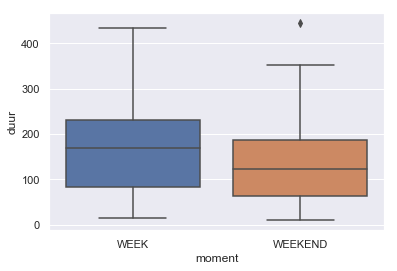

In [710]:
sns.boxplot(x = 'moment', y="duur", data=urengebruik_long)

In [711]:
ttest_ind(urengebruik_wide['WEEK'], urengebruik_wide['WEEKEND'])

Ttest_indResult(statistic=0.8922797664487094, pvalue=0.3754847336078684)

##### df_qualtrics_long 

In [712]:
df_qualtrics_long = pd.melt(df_qualtrics, id_vars="ppn", value_vars =['WEEK','WEEKEND'])
df_qualtrics_long.columns = ["ppn", "moment", "duur"]
df_qualtrics_long.head(5)

,ppn,moment,duur
0,1,WEEK,90
1,2,WEEK,105
2,3,WEEK,240
3,4,WEEK,270
4,5,WEEK,300


In [713]:
df_qualtrics_wide = df_qualtrics

In [714]:
df_qualtrics_long.head(5)

,ppn,moment,duur
0,1,WEEK,90
1,2,WEEK,105
2,3,WEEK,240
3,4,WEEK,270
4,5,WEEK,300


### Stap 5: visualiseren (long format)

#### Swarmplot

###### Gebruik maken van de tijd in minuten, niet in uren. 

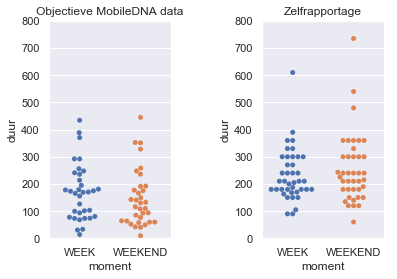

In [715]:
plt.subplots_adjust(wspace=0.75)
plt.subplot(121)
plt.title("Objectieve MobileDNA data")
plt.ylim([0, 800])
sns.swarmplot(x="moment", y="duur", data=urengebruik_long)

ay = plt.subplot(122)
plt.title("Zelfrapportage")
plt.ylim([0, 800])
sns.swarmplot(x="moment", y="duur", data=df_qualtrics_long)

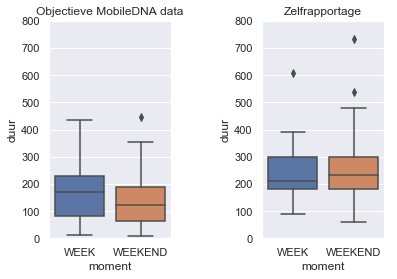

In [716]:
plt.subplots_adjust(wspace=0.75)
plt.subplot(121)
plt.title("Objectieve MobileDNA data")
plt.ylim([0, 800])
sns.boxplot(x="moment", y="duur", data=urengebruik_long)

ay = plt.subplot(122)
plt.title("Zelfrapportage")
plt.ylim([0, 800])
sns.boxplot(x="moment", y="duur", data=df_qualtrics_long)

Ook interessant: ratio van sessie die gestart zijn met notificatie: mensen met hoge ratio zou je kunnen zeggen dat ze snel afgeleid zijn en verwacht je dus slechtere prestatie op attentional span task. 

#### ALs je ze verder wil samen visualiseren moet je ze samen in long format plaatsen en zo aanpassen. 

Bijvoorbeeld een regressieplot zou wel interessant kunnen zijn. Hoe ziet het verloop eruit? 

Is er een significant verschil tussen de tijd die ze zelf schatten en de echte tijd? 

### Stap 6: verschil scores = zelfinschatting - objectieve data (wide format)

<b>positieve verschilscore: </b>participanten schatten hun gebruik hoger in dan ze echt gebruiken. 

<b>negatieve verschilscore: </b>participanten schatten hun gebruik lager in dan ze echt gebruiken. 

#### De twee plots naast elkaar zetten in de wide format. 

In [717]:
wideUse = pd.concat([urengebruik_wide, df_qualtrics_wide], axis=1)

In [718]:
wideUse.head(5)

,ppn,WEEK,WEEKEND,ppn,WEEK,WEEKEND
0,1.0,93.575857,59.394079,1,90,120
1,2.0,170.327992,258.377163,2,105,135
2,3.0,155.398902,149.627047,3,240,180
3,4.0,180.855594,142.894188,4,270,210
4,5.0,241.091306,235.971797,5,300,190


In [333]:
wideUse.to_excel("wideUse.xlsx")

Niet alle participanten die de vragenlijsten hebben ingevuld werden ook gelogd, daarom moeten de dataframe wat geherstructureerd worden voor je ze naast elkaar zet. 

In [719]:
wideUse = pd.read_excel("C:/Users/beheerder/wideUse.xlsx")

##### Nu kan je de verschilscores (voor week en weekend) berekenen. 

In [720]:
wideUse.head(5)

,ppn,WEEK,WEEKEND,WEEK.1,WEEKEND.1
0,1,93.575857,59.394079,90,120
1,2,170.327992,258.377163,105,135
2,3,155.398902,149.627047,240,180
3,4,180.855594,142.894187,270,210
4,5,241.091306,235.971797,300,190


In [721]:
wideUse

,ppn,WEEK,WEEKEND,WEEK.1,WEEKEND.1
0,1,93.575857,59.394079,90,120
1,2,170.327992,258.377163,105,135
2,3,155.398902,149.627047,240,180
3,4,180.855594,142.894187,270,210
4,5,241.091306,235.971797,300,190
5,6,177.922008,175.084126,360,360
6,8,213.760335,166.163972,180,330
7,9,165.289222,109.890183,210,300
8,10,247.708941,116.062314,200,240
9,11,73.993872,76.478897,150,240


In [722]:
wideUse.columns = ["ppn", "WEEK_obj", "WEEKEND_obj", "WEEK_subj", "WEEKEND_subj"]

In [723]:
wideUse.head()

,ppn,WEEK_obj,WEEKEND_obj,WEEK_subj,WEEKEND_subj
0,1,93.575857,59.394079,90,120
1,2,170.327992,258.377163,105,135
2,3,155.398902,149.627047,240,180
3,4,180.855594,142.894187,270,210
4,5,241.091306,235.971797,300,190


Via wideUse (to long-format) kan je nu een ANOVA doen. 

In [724]:
longUse = pd.melt(wideUse,id_vars=['ppn'],var_name='moment_meting', value_name='minuten')

In [725]:
longUse.head()

,ppn,moment_meting,minuten
0,1,WEEK_obj,93.575857
1,2,WEEK_obj,170.327992
2,3,WEEK_obj,155.398902
3,4,WEEK_obj,180.855594
4,5,WEEK_obj,241.091306


In [726]:
longUse = longUse.join(longUse['moment_meting'].str.split('_', 1, expand=True).rename(columns={0: 'moment', 1: 'wijze'}))


In [727]:
mod = ols('minuten ~ C(moment) + C(wijze) + C(moment):C(wijze) ',
                data=longUse).fit()

In [728]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                          sum_sq     df          F    PR(>F)
C(moment)           2.480746e+02    1.0   0.028455  0.866303
C(wijze)            1.623276e+05    1.0  18.619310  0.000031
C(moment):C(wijze)  1.327555e+04    1.0   1.522733  0.219399
Residual            1.150807e+06  132.0        NaN       NaN


effect size? 

In [729]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print(esq_sm)

0.0015259025122773327


In [730]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                minuten   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     6.723
Date:                Sat, 29 Dec 2018   Prob (F-statistic):           0.000295
Time:                        14:04:15   Log-Likelihood:                -807.92
No. Observations:                 136   AIC:                             1624.
Df Residuals:                     132   BIC:                             1635.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               169.4281     16.013     10.581      0.000     137.753     201.104
C(moment)[T.WEEKEND]                    -22.4612     22.646     -0.992      0.323     -67.257      22.335
C(wijze)[T.subj]                         49.3366     22.646      2.179      0.031       4.541      94.132
C(moment)[T.WEEKEND]:C(wijze)[T.subj]    39.5200     32.026      1.234      0.219     -23.831     102.871
==============================================================================
Omnibus:                       14.901   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.300
Skew:                           0.813   Prob(JB):                     0.000289
Kurtosis:                       3.484   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Altijd zelfinschatting - objectieve data

In [731]:
wideUse["verschilWEEK"] = wideUse["WEEK_subj"] - wideUse["WEEK_obj"]

In [732]:
wideUse["verschilWEEKEND"] =  wideUse["WEEKEND_subj"] - wideUse["WEEKEND_obj"]

In [733]:
wideUse.head(5)

,ppn,WEEK_obj,WEEKEND_obj,WEEK_subj,WEEKEND_subj,verschilWEEK,verschilWEEKEND
0,1,93.575857,59.394079,90,120,-3.575857,60.605921
1,2,170.327992,258.377163,105,135,-65.327992,-123.377163
2,3,155.398902,149.627047,240,180,84.601098,30.372953
3,4,180.855594,142.894187,270,210,89.144406,67.105813
4,5,241.091306,235.971797,300,190,58.908694,-45.971797


In [734]:
wideUse[["verschilWEEK","verschilWEEKEND"]].describe()

,verschilWEEK,verschilWEEKEND
count,34.000000,34.000000
mean,49.336610,88.856594
std,89.848650,76.790806
min,-124.176603,-123.377163
25%,-11.054909,36.677435
50%,61.225475,82.334163
75%,104.270059,163.757297
max,226.814294,191.023767


C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


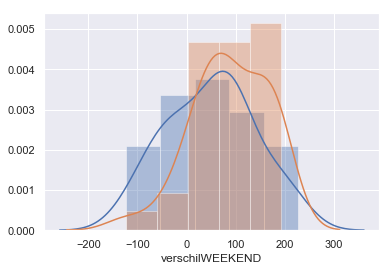

In [159]:
sns.distplot(wideUse["verschilWEEK"])
sns.distplot(wideUse["verschilWEEKEND"])

Gemiddeld gezien komen er dus positieve verschilscores voor = overschatting bij rapportering. In de week is dit een gemiddelde overschatting van bijna 50 minuten, terwijl dit tijdens het weekend een overschatting dan van meer dan een uur en half is. 

In [743]:
schattingwide = wideUse[["ppn", "verschilWEEK","verschilWEEKEND"]]
schattingwide.to_excel("verschil.xlsx")

In [742]:
schattinglong = pd.melt(schattingwide,id_vars=['ppn'],var_name='moment', value_name='minuten_verschil')

In [737]:
mod = ols('minuten_verschil ~ C(moment)',
                data=schattinglong).fit()

In [738]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                  sum_sq    df         F    PR(>F)
C(moment)   26551.095446   1.0  3.801266  0.055464
Residual   460997.058599  66.0       NaN       NaN


In [739]:
leeg["verschilWEEK"] = wideUse["verschilWEEK"]
leeg["verschilWEEKEND"]  = wideUse["verschilWEEKEND"]

In [399]:
leeg.head(5)

,log,perdag_sec,meanUdag,meanMindag,meanAppsdag,verschilWEEK,verschilWEEKEND,meanMinWEEK,meanMinWEEKEND
ppn,,,,,,,,,
1,18,5128.896111,1.424693,85.481602,10.333333,-65.327992,-123.377163,170.327992,258.377163
2,14,11729.093857,3.258082,195.484898,24.500000,84.601098,30.372953,155.398902,149.627047
3,18,10244.489722,2.845692,170.741495,21.055556,89.144406,67.105813,180.855594,142.894188
4,12,10996.385500,3.054552,183.273092,23.000000,58.908694,-45.971797,241.091306,235.971797
5,17,15226.044588,4.229457,253.767410,27.352941,182.077992,184.915874,177.922008,175.084126


In [740]:
leeg.to_excel("subobj.xlsx")

### Samenvatting: welke data kunnen we hier uit "leeg" halen per participant? 

<b>Per participant kan je er nu uithalen:</b>
<li>log: aantal dagen smartphone gebruik gelogd. </li>
<li>perdag_sec: aantal seconden de smartphone wordt gebruikt per dag. </li>
<li>meanUdag: gemiddeld aantal uren per dag smartphone gebruik</li>
<li>meanMindag: gemiddeld aantal minuten per dag smartphonegebruik</li>
<li>meanAppsdag: gemiddeld aantal apps gebruikt op een dag</li>
<li>meanMinWeek: gemiddeld aantal minuten smartphone per dag tijdens de week</li>
<li>meanMinWeekend: gemiddeld aantal minuten smartphone per dag tijdens weekend</li>
<li>verschilWEEK: verschil in subjectieve en objectieve gebruik per dag tijdens week</li>
<li>verschilWEEKEND: verschil in subjectieve en objectieve gebruik per dag tijdens weekend</li>

## Piekgebruik

Appevents per tijdsblok, zoals qualtricsvragenlijst: [23 - 5u], [5u - 9u] [9u - 12u], [12u-13u], [13u - 18u], [18u - 23u]

##### kolom "uur" aanmaken die weergeeft op welk uur een appevent is begonnen. Op basis van dat uur kunnen we dan de verschillende appevents van een persoon toekennen aan een categorie. 

In [105]:
df['uur'] = df.startTime.dt.hour
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,dag,duur,day,moment,uur
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.540000e+12,2018-11-06,0.0,6.0,WEEK,18.0
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.540000e+12,2018-11-06,0.0,6.0,WEEK,18.0
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.540000e+12,2018-11-07,0.0,7.0,WEEK,19.0
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.540000e+12,2018-11-07,0.0,7.0,WEEK,19.0
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.540000e+12,2018-11-07,0.0,7.0,WEEK,23.0


### Aan uurblok van de vragenlijst toevoegen (rechtstreeks op de dataframe)

In [106]:
def set_blok(row):
    if row['uur'] == 23:
        return "23U-5U"
    if row['uur'] == 0:
        return "23U-5U"
    if row['uur']== 1:
        return"23U-5U"
    if row['uur']== 2:
        return"23U-5U"
    if row['uur']== 3:
        return"23U-5U"
    if row['uur']== 4:
        return"23U-5U"
    if row['uur']== 5:
        return"5U-9U"
    if row['uur']== 6:
        return"5U-9U"
    if row['uur']== 7:
        return"5U-9U"
    if row['uur']== 8:
        return"5U-9U"
    if row['uur']== 9:
        return"9U-12U"
    if row['uur']== 10:
        return"9U-12U"
    if row['uur']== 11:
        return"9U-12U"
    if row['uur']== 12:
        return"12U-13U"
    if row['uur']== 13:
        return"13U-18U"
    if row['uur']== 14:
        return"13U-18U"
    if row['uur']== 15:
        return"13U-18U"
    if row['uur']== 16:
        return"13U-18U"
    if row['uur']== 17:
        return"13U-18U"
    if row['uur']== 18:
        return"18U-23U"
    if row['uur']== 19:
        return"18U-23U"
    if row['uur']== 20:
        return"18U-23U"
    if row['uur']== 21:
        return"18U-23U"
    if row['uur']== 22:
        return"18U-23U"
df["uurblok"] = df.apply(set_blok, axis=1)

In [779]:
(df.groupby(['ppn', 'uurblok'])
     .agg({'application': 'count', 'session': 'nunique'})
     .rename(columns={'application': 'appevents', 'session': 'un_sessions'}))

df_TOTUSE = (df.groupby(['ppn'])
     .agg({'application': 'count', 'session': 'nunique'})
     .rename(columns={'application': 'appevents', 'session': 'un_sessions'}))
df_piek = (df.groupby(['ppn', 'uurblok'])
     .agg({'application': 'count', 'session': 'nunique'})
     .rename(columns={'application': 'appevents', 'session': 'un_sessions'}))

##### proportie appevents & un_sessions per uurblok per participant. 

In [748]:
df_TOTUSE.to_excel("df_TOTUSE.xlsx")

In [756]:
df_TOTUSE

,appevents,un_sessions
ppn,,
1,928,387
2,4202,612
3,2582,927
4,2662,757
5,3813,1603
6,2937,1064
8,2938,939
9,1825,1030
10,3785,1333


##### df_piek to wide en dan de twee kolommen door zijn totale waarde delen bij df_TOTUSE

In [781]:
df_piek = df_piek.reset_index()

In [782]:
df_piek_wide = df_piek.pivot(index='ppn', columns='uurblok', values=['appevents','un_sessions'])

##### nu de proportie appevents en un_sessions per persoon berekenen. 

In [783]:
piek_abs = df_piek_wide.merge(df_TOTUSE, on = "ppn")

C:\Users\beheerder\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [784]:
piek_abs.columns = ["appevents_12U-13U","appevents_13U-18U","appevents_18U-23U","appevents_23U-5U","appevents_5U-9U","appevents_9U-12U","un_sessions_12U-13U","un_sessions_13U-18U","un_sessions_18U-23U","un_sessions_23U-5U","un_sessions_5U-9U","un_sessions_9U-12U", "TOT_appevents","TOT_un_sessions"]

In [785]:
piek_abs = piek_abs.reset_index()

In [786]:
piek_abs.head()

,ppn,appevents_12U-13U,appevents_13U-18U,appevents_18U-23U,appevents_23U-5U,appevents_5U-9U,appevents_9U-12U,un_sessions_12U-13U,un_sessions_13U-18U,un_sessions_18U-23U,un_sessions_23U-5U,un_sessions_5U-9U,un_sessions_9U-12U,TOT_appevents,TOT_un_sessions
0,1,41,306,319,80,27,155,19,131,132,34,13,66,928,387
1,2,142,1025,1200,655,444,736,22,162,207,95,46,94,4202,612
2,3,100,669,710,450,201,452,40,248,289,132,61,172,2582,927
3,4,114,616,765,372,193,602,35,196,239,121,66,116,2662,757
4,5,232,1200,1202,566,183,430,88,475,506,288,86,181,3813,1603


In [787]:
piek_abs["prop_appevents_12U-13U"] = piek_abs["appevents_12U-13U"]/ piek_abs["TOT_appevents"]
piek_abs["prop_appevents_13U-18U"] = piek_abs["appevents_13U-18U"]/ piek_abs["TOT_appevents"]
piek_abs["prop_appevents_18U-23U"] = piek_abs["appevents_18U-23U"]/ piek_abs["TOT_appevents"]
piek_abs["prop_appevents_23U-5U"] = piek_abs["appevents_23U-5U"]/ piek_abs["TOT_appevents"]
piek_abs["prop_appevents_5U-9U"] = piek_abs["appevents_5U-9U"]/ piek_abs["TOT_appevents"]
piek_abs["prop_appevents_9U-12U"] = piek_abs["appevents_9U-12U"]/ piek_abs["TOT_appevents"]

In [788]:
piek_abs["prop_un_sessions_12U-13U"] = piek_abs["un_sessions_12U-13U"]/ piek_abs["TOT_un_sessions"]
piek_abs["prop_un_sessions_13U-18U"] = piek_abs["un_sessions_13U-18U"]/ piek_abs["TOT_un_sessions"]
piek_abs["prop_un_sessions_18U-23U"] = piek_abs["un_sessions_18U-23U"]/ piek_abs["TOT_un_sessions"]
piek_abs["prop_un_sessions_23U-5U"] = piek_abs["un_sessions_23U-5U"]/ piek_abs["TOT_un_sessions"]
piek_abs["prop_un_sessions_5U-9U"] = piek_abs["un_sessions_5U-9U"]/ piek_abs["TOT_un_sessions"]
piek_abs["prop_un_sessions_9U-12U"] = piek_abs["un_sessions_9U-12U"]/ piek_abs["TOT_un_sessions"]

In [790]:
piek_abs.to_excel("piek_prop.xlsx")

In [793]:
prop_appevents = piek_abs[['ppn',"prop_appevents_12U-13U","prop_appevents_13U-18U","prop_appevents_18U-23U", "prop_appevents_23U-5U", "prop_appevents_5U-9U", "prop_appevents_9U-12U"]]

In [794]:
prop_un_sessions = piek_abs[['ppn', "prop_un_sessions_12U-13U","prop_un_sessions_13U-18U", "prop_un_sessions_18U-23U","prop_un_sessions_23U-5U","prop_un_sessions_5U-9U", "prop_un_sessions_9U-12U"  ]]

In [795]:
prop_appevents_long=pd.melt(prop_appevents,id_vars=['ppn'],var_name='uurblok', value_name='prop_appevents')
prop_un_sessions_long = pd.melt(prop_un_sessions, id_vars=['ppn'],var_name='uurblok', value_name='prop_un_sessions')

In [800]:
prop_appevents.describe()

,ppn,prop_appevents_12U-13U,prop_appevents_13U-18U,prop_appevents_18U-23U,prop_appevents_23U-5U,prop_appevents_5U-9U,prop_appevents_9U-12U
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,19.029412,0.065113,0.314689,0.312911,0.106025,0.052886,0.148377
std,10.994448,0.019250,0.043922,0.050119,0.045737,0.026323,0.035255
min,1.000000,0.033793,0.216438,0.172269,0.028935,0.008258,0.083272
25%,10.250000,0.055357,0.293767,0.288136,0.073717,0.029157,0.118849
50%,18.500000,0.064304,0.324392,0.315195,0.098577,0.053826,0.147032
75%,27.750000,0.074559,0.342907,0.335162,0.138915,0.072838,0.175131
max,38.000000,0.123950,0.387209,0.421918,0.210373,0.108058,0.226146


In [801]:
prop_un_sessions.describe()

,ppn,prop_un_sessions_12U-13U,prop_un_sessions_13U-18U,prop_un_sessions_18U-23U,prop_un_sessions_23U-5U,prop_un_sessions_5U-9U,prop_un_sessions_9U-12U
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,19.029412,0.067555,0.314113,0.329298,0.103977,0.057402,0.143603
std,10.994448,0.017794,0.044446,0.053583,0.046786,0.028760,0.036998
min,1.000000,0.035948,0.190083,0.182266,0.031874,0.013333,0.066667
25%,10.250000,0.054623,0.291966,0.312072,0.063955,0.033674,0.114447
50%,18.500000,0.062020,0.324349,0.331605,0.103135,0.055393,0.154454
75%,27.750000,0.081869,0.340113,0.353254,0.140390,0.076168,0.170732
max,38.000000,0.118227,0.389535,0.473684,0.206612,0.113786,0.202583


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

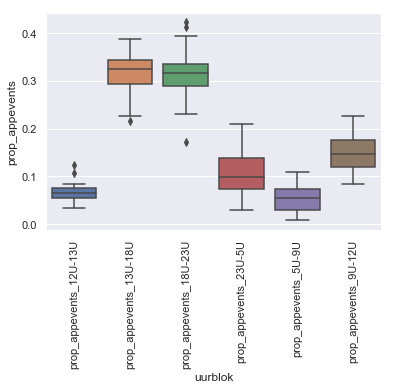

In [798]:
sns.boxplot(x="uurblok", y="prop_appevents", data=prop_appevents_long)
plt.xticks (rotation = "vertical")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

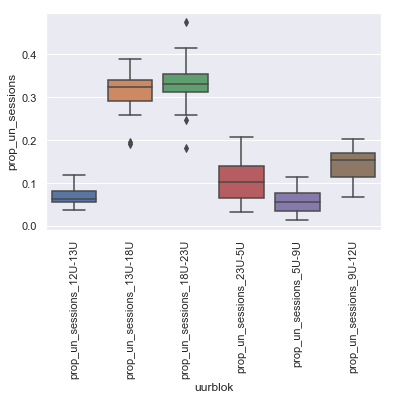

In [799]:
sns.boxplot(x="uurblok", y="prop_un_sessions", data=prop_un_sessions_long)
plt.xticks (rotation = "vertical")

Er gelijkaardige boxplotten qua volgorde en situering. 

##### Top 3 belangrijkste momenten voor elke participant. 

In [813]:
prop_appevents_long.head(20)

,ppn,uurblok,prop_appevents
0,1,prop_appevents_12U-13U,0.044181
1,2,prop_appevents_12U-13U,0.033793
2,3,prop_appevents_12U-13U,0.038730
3,4,prop_appevents_12U-13U,0.042825
4,5,prop_appevents_12U-13U,0.060844
5,6,prop_appevents_12U-13U,0.082397
6,8,prop_appevents_12U-13U,0.082029
7,9,prop_appevents_12U-13U,0.084932
8,10,prop_appevents_12U-13U,0.064201
9,11,prop_appevents_12U-13U,0.062549


In [816]:
prop_appevents_long = prop_appevents_long.sort_values(by = ["ppn","prop_appevents"])

In [824]:
prop_appevents_long["top"] = [6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,
                             6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,
                             6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,
                             6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,
                              6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,
                             6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1,6,5,4,3,2,1]

In [821]:
prop_appevents_long.head(5)

,ppn,uurblok,prop_appevents,top
136,1,prop_appevents_5U-9U,0.029095,6
0,1,prop_appevents_12U-13U,0.044181,5
102,1,prop_appevents_23U-5U,0.086207,4
170,1,prop_appevents_9U-12U,0.167026,3
34,1,prop_appevents_13U-18U,0.329741,2


In [828]:
prop_appevents_top3 = prop_appevents_long[prop_appevents_long["top"] < 4] 

In [830]:
prop_appevents_top3=prop_appevents_top3.sort_values(by = ["ppn", "top"])

In [832]:
prop_appevents_top3_wide= prop_appevents_top3.pivot(index='ppn', columns='top', values='uurblok')

In [833]:
prop_appevents_top3_wide.to_excel("top3_momenten.xlsx")

###### algemeen 

In [802]:
alg_u = df["uur"].value_counts().to_frame()
alg_u = alg_u.reset_index()
alg_u.columns = ["uur", "appevents"]
alg_u.head()

,uur,appevents
0,19.0,6570
1,14.0,6454
2,17.0,6414
3,20.0,6392
4,18.0,6384


Dit toont aan dat de top 5 van belangrijkste momenten met de meeste appevents: 19U, 14U, 17U, 20U, 18U. De minste appevents zijn: 5U, 4U, 6U, 3U, 2U.

###### proportie van de totale aantal appevents 

In [167]:
Tot_appevents = alg_u["appevents"].sum()

In [168]:
alg_u["propAppE"] = alg_u["appevents"]/Tot_appevents

In [169]:
alg_u = alg_u.sort_values(by="uur")

In [170]:
alg_u.head(5)

,uur,appevents,propAppE
16,0.0,2780,0.029058
18,1.0,1355,0.014163
19,2.0,908,0.009491
20,3.0,542,0.005665
22,4.0,242,0.002530


In [419]:
alg_u.dtypes

uur          float64
appevents      int64
propAppE     float64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

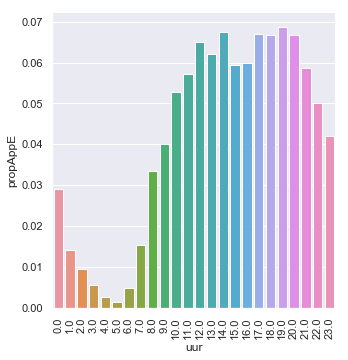

In [174]:
sns.catplot(x= "uur", y="propAppE", kind="bar", data=alg_u)
plt.xticks(rotation=90)

In [803]:
alg_uurblok = df["uurblok"].value_counts().to_frame()

In [805]:
alg_uurblok.sum()

uurblok    95670
dtype: int64

In [806]:
alg_uurblok["prop"] = alg_uurblok["uurblok"]/95670

##### proportie appevents per dagblok 

In [807]:
alg_uurblok

,uurblok,prop
13U-18U,30234,0.316024
18U-23U,29758,0.311048
9U-12U,14348,0.149974
23U-5U,9841,0.102864
12U-13U,6230,0.065120
5U-9U,5259,0.054970


C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

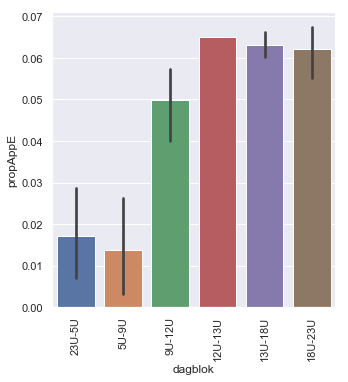

In [175]:
sns.catplot(x= "dagblok", y="propAppE", kind="bar", data=alg_u)
plt.xticks(rotation=90)

In [ ]:
De proportie was het hoogst tijdens 13U-18U en 18U-23U.

##### aantal minuten gebruikt per uurblok

##### Dit klopt nog niet volledig! Dit kan nier meer minuten duren dan er uren in dat blok zijn. m

In [811]:
mm = df.groupby(['ppn','uurblok'])['duur'].sum()/60
piek = mm.groupby(['ppn', 'uurblok']).mean()
piek

ppn  uurblok
1    12U-13U      82.792567
     13U-18U     325.800117
     18U-23U     408.877817
     23U-5U      317.424933
     5U-9U        91.217800
     9U-12U      312.555600
2    12U-13U      45.946550
     13U-18U     540.210517
     18U-23U     779.864483
     23U-5U      606.972767
     5U-9U       340.140900
     9U-12U      423.653350
3    12U-13U     240.455233
     13U-18U     821.587700
     18U-23U     827.280233
     23U-5U      523.476683
     5U-9U       236.172550
     9U-12U      424.374517
4    12U-13U     120.987567
     13U-18U     500.609617
     18U-23U     635.420800
     23U-5U      317.201267
     5U-9U       216.315050
     9U-12U      408.742800
5    12U-13U     171.351017
     13U-18U    1368.027950
     18U-23U    1257.566833
     23U-5U      843.106650
     5U-9U       152.870800
     9U-12U      521.122717
                   ...     
33   12U-13U     114.414517
     13U-18U     456.966400
     18U-23U     356.487517
     23U-5U      183.104567
     5U

In [451]:
piekgebruik = pd.DataFrame(data=piek)

In [456]:
piekgebruik=piekgebruik.reset_index()

##### piekgebruik naar wide 

In [464]:
piekgebruik_wide = piekgebruik.pivot(index='ppn', columns='uurblok', values='duur')

In [466]:
piekgebruik_wide

uurblok,12U-13U,13U-18U,18U-23U,23U-5U,5U-9U,9U-12U
ppn,,,,,,
1,82.792567,325.800117,408.877817,317.424933,91.217800,312.555600
2,45.946550,540.210517,779.864483,606.972767,340.140900,423.653350
3,240.455233,821.587700,827.280233,523.476683,236.172550,424.374517
4,120.987567,500.609617,635.420800,317.201267,216.315050,408.742800
5,171.351017,1368.027950,1257.566833,843.106650,152.870800,521.122717
6,205.763350,928.859700,867.289033,547.829033,275.787917,713.045950
8,261.696150,989.002283,1519.513133,449.925833,59.905750,495.825033
9,128.647933,604.001967,943.459950,405.529283,96.719567,354.562883
10,229.885833,1007.575383,1087.059450,529.527000,316.748533,745.793917


In [467]:
piekgebruik_wide.to_excel("piekgebruikMobileDNA.xlsx")

Je krijgt hiermee dus een idee van gemiddelde aantal minuten gebruik tijdens een blok. 
Dit is misschien nog niet volledig de juiste redenering en moet er eigenlijk naar iets anders worden gekeken: proportie appevents per blok? 

Wat kan ik hier nu verder mee doen? Zijn de blokken die ze hebben aangeduid inderdaad het belangrijkst? 

#### via heatmap krijg je per participant een overzicht van waar de nadruk steeds ligt. 

##### Dit is een heatmap van de minuten 

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 <a list of 17 Text yticklabel objects>)

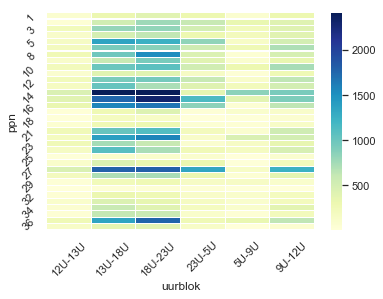

In [551]:
sns.heatmap(piekgebruik_wide, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [244]:
piekgebruik_wide

NameError: name 'piekgebruik_wide' is not defined

##### heatmap van de proportie van appevents

In [247]:
prop

,ppn,12U-13U,13U-18U,18U-23U,23U-5U,5U-9U,9U-12U
0,1,0.044181,0.329741,0.343750,0.086207,0.029095,0.167026
1,2,0.033793,0.243931,0.285578,0.155878,0.105664,0.175155
2,3,0.038730,0.259101,0.274981,0.174284,0.077847,0.175058
3,4,0.042825,0.231405,0.287378,0.139745,0.072502,0.226146
4,5,0.060844,0.314713,0.315237,0.148440,0.047994,0.112772
5,6,0.082397,0.315969,0.264896,0.100102,0.075587,0.161049
6,8,0.082029,0.324711,0.312117,0.107897,0.022124,0.151123
7,9,0.084932,0.315068,0.290411,0.064110,0.066301,0.179178
8,10,0.064201,0.239894,0.320740,0.075033,0.108058,0.192074
9,11,0.062549,0.365911,0.233776,0.081314,0.073495,0.182955


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 <a list of 17 Text yticklabel objects>)

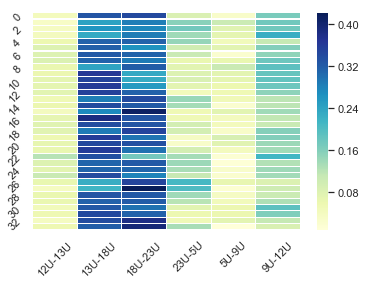

In [248]:
sns.heatmap(prop_wide, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [250]:
prop.to_excel("prop.xlsx")

In [229]:
df_qualtrics = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/qualtrics/qualtricsoriginal.xlsx')

In [251]:
piek_wide = df_qualtrics[["ppn", "12U-13U","13U-18U","18U-23U","23U-5U","5U-9U","9U-12U"]]

In [252]:
piek = piek_wide[["12U-13U","13U-18U","18U-23U","23U-5U","5U-9U","9U-12U"]]

(array([ 0.5,  3.5,  6.5,  9.5, 12.5, 15.5, 18.5, 21.5, 24.5, 27.5, 30.5,
        33.5, 36.5, 39.5]), <a list of 14 Text yticklabel objects>)

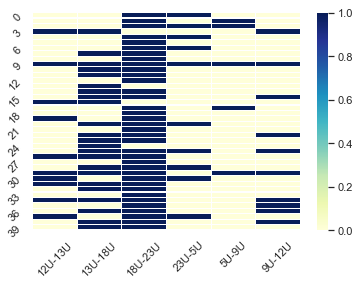

In [253]:
sns.heatmap(piek, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [ ]:
Is het mogelijk om een samengevoegde heatmap te krijgen waarbij je de proportie per participant hebt en de volgende rij dan het antwoord van de participant? 

In [254]:
matched_ppn = prop.append(piek_wide)

In [257]:
matched_ppn = matched_ppn.sort_values(by = "ppn")

In [259]:
matched_ppn = matched_ppn.set_index('ppn')

In [260]:
matched_ppn = matched_ppn[:-5]

In [261]:
matched_ppn 

,12U-13U,13U-18U,18U-23U,23U-5U,5U-9U,9U-12U
ppn,,,,,,
1,0.044181,0.329741,0.343750,0.086207,0.029095,0.167026
1,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
2,0.033793,0.243931,0.285578,0.155878,0.105664,0.175155
2,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
3,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
3,0.038730,0.259101,0.274981,0.174284,0.077847,0.175058
4,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,0.042825,0.231405,0.287378,0.139745,0.072502,0.226146
5,0.060844,0.314713,0.315237,0.148440,0.047994,0.112772


In [264]:
matched_ppn.to_excel("matched_ppn.xlsx")

In [266]:
heatmap_matched_TOT= pd.read_excel("C:/Users/beheerder/matched_ppn.xlsx")

In [269]:
heatmap_matched_TOT  = heatmap_matched_TOT.set_index("ppn")

(array([ 0.5,  4.5,  8.5, 12.5, 16.5, 20.5, 24.5, 28.5, 32.5, 36.5, 40.5,
        44.5, 48.5, 52.5, 56.5, 60.5, 64.5]),
 <a list of 17 Text yticklabel objects>)

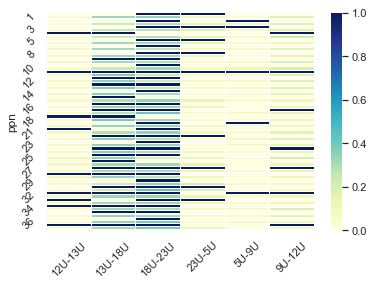

In [270]:
sns.heatmap(heatmap_matched_TOT, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

in twee splitsen om duidelijk te kunnen kijken naar de waarden. 

In [279]:
heatmap_map_1 = heatmap_matched_TOT.loc[:'19', :]
heatmap_map_2 = heatmap_matched_TOT.loc['21':, :]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

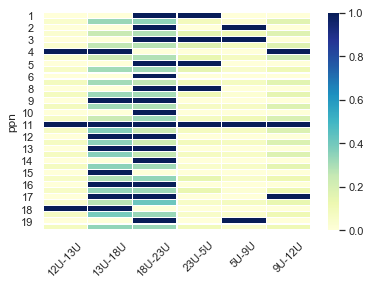

In [283]:
sns.heatmap(heatmap_map_1, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5]), <a list of 16 Text yticklabel objects>)

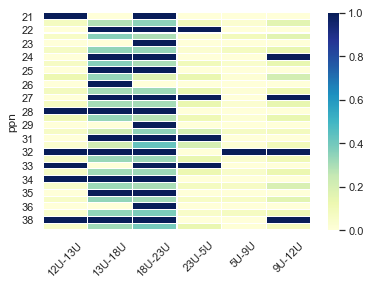

In [299]:
sns.heatmap(heatmap_map_2, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation="horizontal")

#### Hoe kan je hiervoor een inschatting berekenen?

#### We kunnen ook een heatmap verkrijgen met een appevent heatmap per dag van de week: heatmap voor alle respondenten samen 

In [107]:
# Appevent heatmap, uur en dag van de week?
df['dag'] = df['startTime'].dt.weekday_name
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

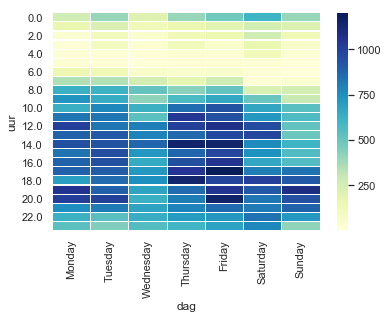

In [397]:
df_heat = df.groupby(["uur", "dag"])["application"].size().reset_index()
df_heat2 = df_heat.pivot("uur", "dag", "application")
df_heat2 = df_heat2.reindex(days_arr, axis=1)
sns.heatmap(df_heat2, cmap="YlGnBu", linewidths=.1)

## appgebruik

In [ ]:
Per participant de 3 top drie belangrijkste apps krijgen. 

### Eerst moeten de apps gecategoriseerd worden naar de categorieeën zoals in de vragenlijst

<ul>
<li>INTERNET/ZOEK</li>
<li>MESSENGERS: COMMUNICATION</li>
<li>SNS: SOCIAL</li>
<li>ENTERTAIN: ENTERTAINMENT, MUSIC, VIDEO PLAYERS</li>
<li>GAMES: GAME_ARCADE</li>
<li>ANDERE</li>
</ul>

In [108]:
cache_path = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/"
app_dict = np.load(cache_path + "app_dict.npy").item()

In [109]:
# Apps categoriseren met script Wouter, licht aangepast
def annotate(df: pd.DataFrame, app_dict: dict, type:str, lookup=False) -> (pd.DataFrame, dict):
    """Annotate virgin data with duration, app meta data."""

    # Does the data frame contain an application column? If not, bugger off.
    if "application" not in df:
        raise Exception("Need an application column to be able to annotate")

    # If lookup is set to True, update app data base, otherwise work locally
    if lookup:
        update_app_meta(df=df, app_dict=app_dict)

    # Store unclassified apps, and how much they occur
    unclassified = {}

    # Subroutine to get genre
    def get_genre_id(row):
        try:
            genre = app_dict[row['application']]['genre_id']
        except:
            genre = 'unknown'
        return genre

    # Subroutine to get app name (no spaces)
    def get_app_name(row, sep="_"):
        try:
            name = app_dict[row['application']]['app_name'].replace(" ", sep)
        except:
            name = 'unknown'
            if row['application'] in unclassified:
                unclassified[row['application']] += 1
            else:
                unclassified[row['application']] = 1
        return name

    # Annotate actual data frame
    try:
        df['app_genre_id'] = df.apply(lambda row: get_genre_id(row), axis=1)
        df['app_name'] = df.apply(lambda row: get_app_name(row), axis=1)
    except Exception as e:
        print("Annotations failed! - ", e)

    return df, unclassified

In [110]:
df_new, unclassified = annotate(df, app_dict=app_dict, type="appevents", lookup=False)

In [111]:
df_new['datum'] = df_new['startTime'].dt.date
df_new['duur'] = (df_new['endTimeMillis'] - df_new['startTimeMillis']) / 1000

In [112]:
df_new.head()

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,startTimeMillis,dag,duur,day,moment,uur,uurblok,app_genre_id,app_name,datum
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.540000e+12,Tuesday,0.0,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.540000e+12,Tuesday,0.0,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.540000e+12,Wednesday,0.0,7.0,WEEK,19.0,18U-23U,SOCIAL,Instagram,2018-11-07
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.540000e+12,Wednesday,0.0,7.0,WEEK,19.0,18U-23U,unknown,unknown,2018-11-07
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.540000e+12,Wednesday,0.0,7.0,WEEK,23.0,23U-5U,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07


De lege categorieën = vaak oneplus gallery = PHOTOGRAPHY
voor in de paper definiëren: 
    * welke app_names vallen onder welke categorie? 
    * welke categorieën vallen onder welke categorieën in de vragenlijst. 

Proberen om Google_Chrome:_Fast_&_Secure in  INTERNET/ZOEK als genre te krijgen. 

<ul>
<li>INTERNET/ZOEK: MAPS_AND_NAVIGATION</li>
<li>MESSENGERS: COMMUNICATION</li>
<li>SNS: SOCIAL</li>
<li>ENTERTAIN: ENTERTAINMENT, MUSIC_AND_AUDIO, VIDEO PLAYERS, PHOTOGRAPHY, SPORTS</li>
<li>GAMES: GAME_ARCADE</li>
<li>ANDERE: FINANCE, HEALTH_AND_FITNESS, LIFESTYLE, NEWS_AND_MAGAZINES, SHOPPING, TOOLS, TRAVEL_AND_LOCAL, unknown</li>
</ul>

In [113]:
def internet(row):
    if row["application"] == "com.android.mms":
        return "MESSENGERS"
    if row["application"] == "com.samsung.android.messaging":
        return "MESSENGERS"
    if row["application"] == "org.mozilla.firefox":
        return "INTERNET/ZOEK"
    if row["application"] == "com.notabasement.mangarock.android.titan":
        return "GAMES"
    if row["application"] == "com.tinyco.potter":
        return "GAMES"
    if row["app_name"] == "Google_Chrome:_Fast_&_Secure":
        return "INTERNET/ZOEK"
    if row["app_name"] == "OnePlus_Gallery":
        return "ENTERTAIN"
    if row["app_genre_id"] == "MAPS_AND_NAVIGATION":
        return "INTERNET/ZOEK"
    if row["app_genre_id"] == "COMMUNICATION":
        return "MESSENGERS"
    if row["app_genre_id"] == "SOCIAL":
        return "SNS"
    if row["app_genre_id"] == "ENTERTAINMENT":
        return "ENTERTAIN"
    if row["app_genre_id"] == "MUSIC_AND_AUDIO":
        return "ENTERTAIN"
    if row["app_genre_id"] == "VIDEO PLAYERS":
        return "ENTERTAIN"
    if row["app_genre_id"] == "PHOTOGRAPHY":
        return "ENTERTAIN"
    if row["app_genre_id"] == "SPORTS":
        return "ENTERTAIN"
    if row["app_genre_id"] == "GAME_ARCADE":
        return "GAMES"
    if row["app_genre_id"] == "FINANCE":
        return "ANDERE"
    if row["app_genre_id"] == "HEALTH_AND_FITNESS":
        return "ANDERE"
    if row["app_genre_id"] == "LIFESTYLE":
        return "ANDERE"
    if row["app_genre_id"] == "NEWS_AND_MAGAZINES":
        return "ANDERE"
    if row["app_genre_id"] == "SHOPPING":
        return "ANDERE"
    if row["app_genre_id"] == "TOOLS":
        return "ANDERE"
    if row["app_genre_id"] == "PRODUCTIVITY":
        return "ANDERE"
    if row["app_genre_id"] == "TRAVEL_AND_LOCAL":
        return "ANDERE"
    if row["app_genre_id"] == "unknown":
        return "ANDERE"
df_new["qualcatapp"] = df_new.apply(internet, axis=1)

In [21]:
df_new.to_excel("dfnew.xlsx")

In [22]:
df_new = pd.read_excel("C:/Users/beheerder/dfnew.xlsx")

In [402]:
df_new.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,dag,duur,day,moment,uur,uurblok,app_genre_id,app_name,datum,qualcatapp
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,2018-11-06,1.642,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,2018-11-06,114.998,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,2018-11-07,2.026,7.0,WEEK,19.0,18U-23U,SOCIAL,Instagram,2018-11-07,SNS
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,2018-11-07,2.528,7.0,WEEK,19.0,18U-23U,unknown,unknown,2018-11-07,ANDERE
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,2018-11-07,22.153,7.0,WEEK,23.0,23U-5U,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07,MESSENGERS


Dus op 3 niveaus zullen we idee krijgen van welke apps ze gebruiken: (1) app_genre_id, (2) app_name, (3) categorie vragenlijst

##### (1) aantal appevents per participant, per app_genre_id gedeeld door aantal dagen dat categorie gelogd is. 

In [844]:
app_genre_id_long = df_new.groupby(['ppn','datum'])['app_genre_id'].value_counts().groupby(['ppn','app_genre_id']).mean().to_frame()
app_genre_id_long.columns = ["mean app events"]
app_genre_id_long = app_genre_id_long.reset_index()

In [872]:
app_genre_id_long = app_genre_id_long.reset_index()

In [874]:
app_genre_id_long

,index,ppn,app_genre_id,mean app events
0,2,1,MAPS_AND_NAVIGATION,1.000000
1,3,1,MUSIC_AND_AUDIO,1.000000
2,5,1,PRODUCTIVITY,1.000000
3,7,1,TOOLS,1.333333
4,9,1,VIDEO_PLAYERS,2.000000
5,8,1,TRAVEL_AND_LOCAL,3.333333
6,0,1,COMMUNICATION,6.200000
7,4,1,PHOTOGRAPHY,7.666667
8,6,1,SOCIAL,7.941176
9,10,1,unknown,21.882353


##### top 3 Mobile DNA app cat 

In [865]:
app_genre_id_long = app_genre_id_long.sort_values(by = ["ppn", "mean app events"])

In [866]:
app_genre_id_long_3 = app_genre_id_long.groupby('ppn')['mean app events'].nlargest(3).to_frame()

In [870]:
app_genre_id_long_3=app_genre_id_long_3.reset_index()

In [875]:
app_genre_id_long_3.columns = ["ppn","index","mean app events"]

In [882]:
MobileDNA_3 = pd.merge(app_genre_id_long_3 , app_genre_id_long[["index","app_genre_id"]], on="index")

In [885]:
MobileDNA_3["top"] = ["1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                     "1","2","3","1","2","3","1","2","3","1","2","3"]

In [887]:
MobileDNA_3_wide = MobileDNA_3.pivot(index='ppn', columns='top', values='app_genre_id')

In [890]:
MobileDNA_3_wide.to_excel("MobileDNA3_wide.xlsx")

##### Proporties van mean app events per applicatie. 

In [851]:
app_genre_id_wide = app_genre_id_long.pivot(index="ppn", columns="app_genre_id", values = "mean app events")
collist = list(app_genre_id_wide)

In [853]:
app_genre_id_wide['Tot_mean_app_events'] = app_genre_id_wide[collist].sum(axis=1)

In [855]:
app_genre_id_wide["prop_mean_app_eventsCOMMUNICATION"]=app_genre_id_wide["COMMUNICATION"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsENTERTAINMENT"]=app_genre_id_wide["ENTERTAINMENT"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsFINANCE"]=app_genre_id_wide["FINANCE"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsGAME_ARCADE"]=app_genre_id_wide["GAME_ARCADE"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsHEALTH_AND_FITNESS"]=app_genre_id_wide["HEALTH_AND_FITNESS"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsLIFESTYLE"]=app_genre_id_wide["LIFESTYLE"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsMAPS_AND_NAVIGATION"]=app_genre_id_wide["MAPS_AND_NAVIGATION"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsMUSIC_AND_AUDIO"]=app_genre_id_wide["MUSIC_AND_AUDIO"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsNEWS_AND_MAGAZINES"]=app_genre_id_wide["NEWS_AND_MAGAZINES"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsPHOTOGRAPHY"]=app_genre_id_wide["PHOTOGRAPHY"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsPRODUCTIVITY"]=app_genre_id_wide["PRODUCTIVITY"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsSHOPPING"]=app_genre_id_wide["SHOPPING"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsSOCIAL"]=app_genre_id_wide["SOCIAL"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsSPORTS"]=app_genre_id_wide["SPORTS"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsTOOLS"]=app_genre_id_wide["TOOLS"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsTRAVEL_AND_LOCAL"]=app_genre_id_wide["TRAVEL_AND_LOCAL"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsVIDEO_PLAYERS"]=app_genre_id_wide["VIDEO_PLAYERS"]/app_genre_id_wide["Tot_mean_app_events"]
app_genre_id_wide["prop_mean_app_eventsunknown"]=app_genre_id_wide["unknown"]/app_genre_id_wide["Tot_mean_app_events"]

In [857]:
app_genre_id_wide.to_excel("app_genre_ID.xlsx")

##### Categorieën worden door hoeveel van de participanten gebruikt: hoe populair zijn de verschillende categorieën? 

In [407]:
MobileDNA_cat = app_genre_id_long["app_genre_id"].value_counts().to_frame()

In [408]:
MobileDNA_cat

,app_genre_id
unknown,34
TOOLS,34
COMMUNICATION,34
PRODUCTIVITY,34
SOCIAL,33
LIFESTYLE,33
TRAVEL_AND_LOCAL,32
VIDEO_PLAYERS,32
PHOTOGRAPHY,30
MUSIC_AND_AUDIO,29


In [409]:
MobileDNA_cat = MobileDNA_cat.reset_index()

In [410]:
MobileDNA_cat.head()

,index,app_genre_id
0,unknown,34
1,TOOLS,34
2,COMMUNICATION,34
3,PRODUCTIVITY,34
4,SOCIAL,33


In [414]:
MobileDNA_cat.columns = ["app_genre_id", "aantal"]

In [415]:
MobileDNA_cat["prop"] = MobileDNA_cat["aantal"]/34

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

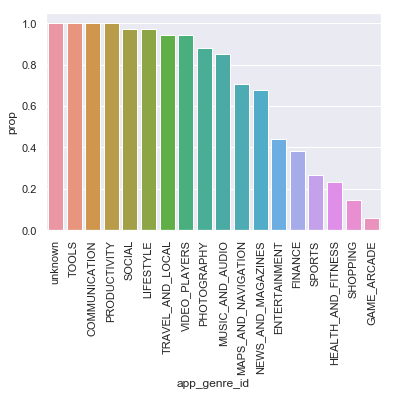

In [416]:
sns.barplot(x="app_genre_id", y="prop", data=MobileDNA_cat)
plt.xticks(rotation="vertical")

In [420]:
top10_Mob = df_new.groupby([ 'app_genre_id'])['duur'].sum().reset_index()

In [421]:
top10_Mob

,app_genre_id,duur
0,COMMUNICATION,1098008.467
1,ENTERTAINMENT,136283.750
2,FINANCE,8080.213
3,GAME_ARCADE,3.014
4,HEALTH_AND_FITNESS,725.470
5,LIFESTYLE,41680.352
6,MAPS_AND_NAVIGATION,14753.469
7,MUSIC_AND_AUDIO,85791.136
8,NEWS_AND_MAGAZINES,100169.570
9,PHOTOGRAPHY,58866.803


In [422]:
top10_Mob_select = top10_Mob['duur'].nlargest(10).reset_index()

In [424]:
top10_Mob_select

,index,duur
0,12,1743493.332
1,17,1434871.685
2,0,1098008.467
3,16,690813.791
4,1,136283.750
5,10,101381.340
6,8,100169.570
7,7,85791.136
8,15,59569.516
9,9,58866.803


In [425]:
df_top10= pd.merge(top10_Mob_select, top10_Mob[["app_genre_id"]], left_on='index', right_index=True)
df_top10

,index,duur,app_genre_id
0,12,1743493.332,SOCIAL
1,17,1434871.685,unknown
2,0,1098008.467,COMMUNICATION
3,16,690813.791,VIDEO_PLAYERS
4,1,136283.750,ENTERTAINMENT
5,10,101381.340,PRODUCTIVITY
6,8,100169.570,NEWS_AND_MAGAZINES
7,7,85791.136,MUSIC_AND_AUDIO
8,15,59569.516,TRAVEL_AND_LOCAL
9,9,58866.803,PHOTOGRAPHY


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

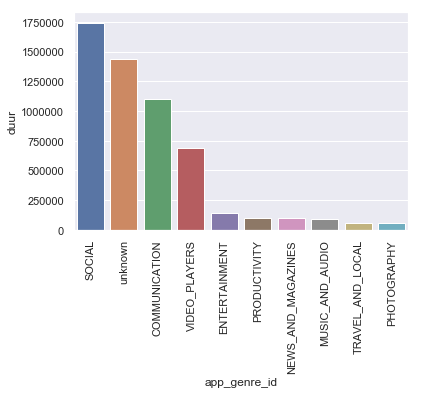

In [426]:
sns.barplot(x="app_genre_id", y="duur", data=df_top10)
plt.xticks(rotation="vertical")

In [858]:
app_genre_id_wide.describe()

app_genre_id,COMMUNICATION,ENTERTAINMENT,FINANCE,GAME_ARCADE,HEALTH_AND_FITNESS,LIFESTYLE,MAPS_AND_NAVIGATION,MUSIC_AND_AUDIO,NEWS_AND_MAGAZINES,PHOTOGRAPHY,...,prop_mean_app_eventsNEWS_AND_MAGAZINES,prop_mean_app_eventsPHOTOGRAPHY,prop_mean_app_eventsPRODUCTIVITY,prop_mean_app_eventsSHOPPING,prop_mean_app_eventsSOCIAL,prop_mean_app_eventsSPORTS,prop_mean_app_eventsTOOLS,prop_mean_app_eventsTRAVEL_AND_LOCAL,prop_mean_app_eventsVIDEO_PLAYERS,prop_mean_app_eventsunknown
count,34.000000,15.000000,13.000000,2.0,8.000000,33.000000,24.000000,29.000000,23.000000,30.000000,...,23.000000,30.000000,34.000000,5.000000,33.000000,9.000000,34.000000,32.000000,32.000000,34.000000
mean,38.722447,3.086614,2.452120,1.0,2.550595,3.285498,2.925496,8.487192,4.614220,4.062076,...,0.023108,0.025400,0.027105,0.006875,0.200419,0.020148,0.028931,0.028948,0.027692,0.366247
std,31.318907,2.842608,1.222309,0.0,2.027885,5.296392,2.711017,7.623057,4.857422,3.241472,...,0.015155,0.018516,0.017710,0.002851,0.086010,0.016253,0.030673,0.023931,0.021043,0.105709
min,6.200000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.004245,0.004245,0.004245,0.004211,0.022233,0.002814,0.004955,0.006670,0.005057,0.129383
25%,17.275210,1.500000,1.750000,1.0,1.428571,1.500000,1.000000,3.000000,1.916667,2.208333,...,0.012290,0.014506,0.015629,0.005559,0.141604,0.008734,0.013300,0.015773,0.013970,0.283339
50%,32.764706,2.000000,2.000000,1.0,1.916667,2.000000,2.100000,6.818182,2.545455,3.437500,...,0.018837,0.020492,0.021119,0.005922,0.215838,0.014013,0.020881,0.023290,0.023464,0.349528
75%,44.916667,3.500000,3.000000,1.0,2.500000,2.666667,3.107143,11.000000,4.708333,4.071429,...,0.027387,0.030274,0.032450,0.007038,0.237706,0.034984,0.030410,0.029975,0.032340,0.457234
max,151.058824,11.400000,4.600000,1.0,7.000000,31.444444,13.375000,30.437500,18.071429,17.125000,...,0.056981,0.090407,0.077234,0.011645,0.381339,0.045494,0.143118,0.123447,0.109068,0.579233


In [516]:
app_genre_id_wide.to_excel("app_genre_id_wide.xlsx")

##### (2) aantal appevents per participant, per app_name gedeeld door aantal dagen dat categorie gelogd is. 

In [311]:
app_name_long = df_new.groupby(['ppn','datum'])['app_name'].value_counts().groupby(['ppn','app_name']).mean().to_frame()
app_name_long.columns = ["mean app events"]
app_name_long = app_name_long.reset_index()

In [942]:
app_long = df_new.groupby(['ppn','datum'])['application'].value_counts().groupby(['ppn','application']).mean().to_frame()
app_long.columns = ["mean app events"]
app_long = app_long.reset_index()

In [943]:
app_long.head()

,ppn,application,mean app events
0,1,android,2.000000
1,1,be.belfius.directmobile.android,4.000000
2,1,be.ugent.mobiledna,1.666667
3,1,cn.wps.moffice_eng,2.000000
4,1,com.android.chrome,3.583333


In [312]:
app_name_long.head()

,ppn,app_name,mean app events
0,1,Facebook,1.500000
1,1,Google,2.000000
2,1,Google_Calendar,1.000000
3,1,Google_Chrome:_Fast_&_Secure,3.583333
4,1,Google_Drive,1.000000


##### Top 3 specifieke apps

In [896]:
app_name_long = app_name_long.sort_values(by = ["ppn", "mean app events"])
app_name_long = app_name_long.reset_index()

In [944]:
app_long = app_long.sort_values(by = ["ppn", "mean app events"])

In [945]:
app_long_3 = app_long.groupby('ppn')['mean app events'].nlargest(3).to_frame()
app_long_3=app_long_3.reset_index()

In [946]:
app_long_3.head()

,ppn,level_1,mean app events
0,1,35,34.750000
1,1,20,7.666667
2,1,27,6.882353
3,2,53,71.285714
4,2,89,36.785714


In [947]:
app_long = app_long.reset_index()

In [891]:
app_name_long_3 = app_name_long.groupby('ppn')['mean app events'].nlargest(3).to_frame()
app_name_long_3 = app_name_long_3.reset_index()

In [938]:
app_name_long_3.columns = ["ppn","index","mean app events"]
app_name_long_3 = pd.merge(app_name_long_3 , app_name_long[["index","app_name"]], on="index")

ValueError: Length mismatch: Expected axis has 5 elements, new values have 3 elements

In [948]:
app_long_3.columns = ["ppn","index","mean app events"]
app_long_3 = pd.merge(app_long_3 , app_long[["index","application"]], on="index")

In [898]:
app_name_long_3["top"] = ["1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                     "1","2","3","1","2","3","1","2","3","1","2","3"]

In [949]:
app_long_3["top"] = ["1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                     "1","2","3","1","2","3","1","2","3","1","2","3"]

In [901]:
app_name_wide_3 = app_name_long_3.pivot(index='ppn', columns='top', values='app_name')

In [951]:
app_wide_3 = app_long_3.pivot(index='ppn', columns='top', values='application')

In [914]:
app_name_wide_3.head()

top,1,2,3
ppn,,,
1,Tinder,unknown,Google_Photos
2,unknown,Snapchat,Google_Chrome:_Fast_&_Secure
3,unknown,Instagram,Messenger_–_Text_and_Video_Chat_for_Free
4,unknown,Messenger_–_Text_and_Video_Chat_for_Free,Snapchat
5,unknown,Instagram,Snapchat


In [952]:
app_wide_3

top,1,2,3
ppn,,,
1,com.tinder,com.google.android.apps.photos,com.instagram.android
2,com.android.mms,com.snapchat.android,com.android.chrome
3,com.instagram.android,com.samsung.android.messaging,com.facebook.orca
4,com.android.mms,com.facebook.orca,com.snapchat.android
5,com.takeaway.driver,com.instagram.android,com.android.systemui
6,com.android.systemui,com.facebook.orca,com.evilapples.app
8,com.facebook.orca,com.facebook.katana,com.instagram.android
9,com.android.systemui,com.facebook.katana,com.instagram.android
10,com.android.systemui,com.android.mms,com.facebook.orca


In [313]:
app_name_wide = app_name_long.pivot(index="ppn", columns="app_name", values = "mean app events")

In [314]:
app_name_wide

app_name,AZ_Screen_Recorder_-_No_Root,Adobe_Acrobat_Reader,Bancontact,"Blue_Light_Filter_-_Night_Mode,_Eye_Care",DeMorgen.be_Mobile,De_Standaard-_Krant_&_dS_Avond,Device_Maintenance,Dropbox,Easy_Banking_App,"Evernote_–_Take_Notes,_Plan,_Organize",...,Viking_App_(Official),"Waze_-_GPS,_Maps,_Traffic_Alerts_&_Live_Navigation",WhatsApp_Messenger,Yelo_Play,YouTube,bol.com,itsme,mobileDNA,musical.ly,unknown
ppn,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,1.666667,NaN,21.882353
2,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,...,NaN,9.333333,6.692308,3.0,1.666667,NaN,NaN,2.000000,NaN,156.928571
3,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,2.533333,7.000000,...,NaN,NaN,13.352941,NaN,3.000000,NaN,NaN,1.500000,NaN,65.235294
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.800000,NaN,2.125000,NaN,NaN,1.500000,NaN,112.166667
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,10.562500,1.000000,NaN,2.375000,NaN,120.647059
6,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,...,NaN,NaN,3.666667,NaN,3.363636,2.250000,NaN,2.666667,NaN,101.882353
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,1.200000,NaN,56.294118
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.600000,NaN,4.200000,NaN,NaN,2.000000,NaN,47.941176
10,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.733333,NaN,5.600000,NaN,NaN,5.000000,NaN,124.117647


In [316]:
app_name_wide.describe()

app_name,AZ_Screen_Recorder_-_No_Root,Adobe_Acrobat_Reader,Bancontact,"Blue_Light_Filter_-_Night_Mode,_Eye_Care",DeMorgen.be_Mobile,De_Standaard-_Krant_&_dS_Avond,Device_Maintenance,Dropbox,Easy_Banking_App,"Evernote_–_Take_Notes,_Plan,_Organize",...,Viking_App_(Official),"Waze_-_GPS,_Maps,_Traffic_Alerts_&_Live_Navigation",WhatsApp_Messenger,Yelo_Play,YouTube,bol.com,itsme,mobileDNA,musical.ly,unknown
count,2.00000,3.000000,1.0,3.000000,4.000000,2.000000,5.000000,1.0,2.000000,4.000000,...,8.000000,2.000000,31.000000,2.00000,32.000000,5.000000,1.0,32.000000,2.000000,34.000000
mean,7.50000,1.555556,1.0,1.607143,2.083333,2.250000,2.050000,1.0,3.266667,2.916667,...,1.645833,6.166667,9.371318,2.25000,5.120156,1.885556,1.0,1.882978,4.000000,70.820702
std,2.12132,0.509175,NaN,0.376273,1.230402,0.353553,0.570088,NaN,1.037090,2.753785,...,1.025227,4.478343,14.913785,1.06066,5.395822,0.700348,NaN,0.839270,1.414214,41.289747
min,6.00000,1.000000,1.0,1.250000,1.000000,2.000000,1.500000,1.0,2.533333,1.000000,...,1.000000,3.000000,1.000000,1.50000,1.000000,1.000000,1.0,1.000000,3.000000,9.928571
25%,6.75000,1.333333,1.0,1.410714,1.250000,2.125000,1.750000,1.0,2.900000,1.500000,...,1.000000,4.583333,2.607143,1.87500,2.093750,1.400000,1.0,1.362500,3.500000,41.402941
50%,7.50000,1.666667,1.0,1.571429,1.791667,2.250000,2.000000,1.0,3.266667,1.833333,...,1.250000,6.166667,3.833333,2.25000,3.404040,2.000000,1.0,1.791667,4.000000,61.246324
75%,8.25000,1.833333,1.0,1.785714,2.625000,2.375000,2.000000,1.0,3.633333,3.250000,...,1.750000,7.750000,8.900000,2.62500,5.559091,2.250000,1.0,2.035714,4.500000,100.073529
max,9.00000,2.000000,1.0,2.000000,3.750000,2.500000,3.000000,1.0,4.000000,7.000000,...,4.000000,9.333333,80.764706,3.00000,27.294118,2.777778,1.0,5.000000,5.000000,159.357143


###### welke specifieke apps worden meest gebruikt? 

In [318]:
specifiek = app_name_long['app_name'].value_counts().to_frame()

In [ ]:
welke apps worden door meer dan 10 van de participanten gebruikt? 

In [320]:
specifiek_gr10 = specifiek[specifiek["app_name"]>10]

In [321]:
specifiek_gr10

,app_name
Messenger_–_Text_and_Video_Chat_for_Free,34
Google_Chrome:_Fast_&_Secure,34
unknown,34
YouTube,32
Maps_-_Navigation_&_Transit,32
Facebook,32
mobileDNA,32
WhatsApp_Messenger,31
Instagram,31
Google,30


In [322]:
specifiek_gr10 = specifiek_gr10.reset_index()

In [324]:
specifiek_gr10.columns=["specifiek app_name", "aantal"]

In [325]:
specifiek_gr10["proportie"] = specifiek_gr10["aantal"]/34

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

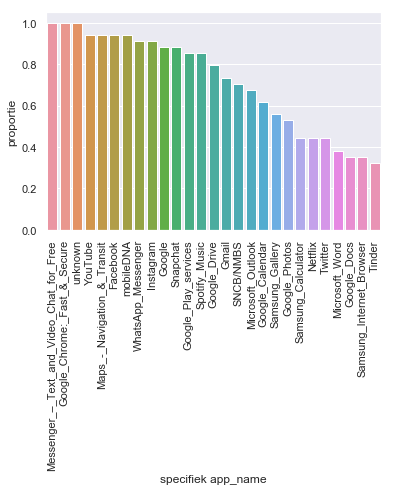

In [328]:
sns.barplot(x="specifiek app_name", y="proportie", data=specifiek_gr10)
plt.xticks(rotation="vertical")

In [522]:
app_name_wide.to_excel("specifieke_app_wide.xlsx")

###### per participant top 5 van de meest gebruikte apps 

In [953]:
top5_test = df_new.groupby(['ppn','application', 'app_name'])['duur'].sum().reset_index()
top5 = top5_test.groupby('ppn')['duur'].nlargest(5).reset_index()
top5

,ppn,level_1,duur
0,1,27,25388.333
1,1,35,18246.803
2,1,28,13472.187
3,1,4,13020.013
4,1,24,6451.432
5,2,49,45661.476
6,2,89,25117.919
7,2,65,19551.342
8,2,44,17334.846
9,2,53,16235.104


In [954]:
df_top5 = pd.merge(top5, top5_test[['application','app_name']], left_on='level_1', right_index=True)
df_top5

,ppn,level_1,duur,application,app_name
0,1,27,25388.333,com.instagram.android,Instagram
1,1,35,18246.803,com.tinder,Tinder
2,1,28,13472.187,com.notabasement.mangarock.android.titan,unknown
3,1,4,13020.013,com.android.chrome,Google_Chrome:_Fast_&_Secure
4,1,24,6451.432,com.google.android.youtube,YouTube
5,2,49,45661.476,com.android.chrome,Google_Chrome:_Fast_&_Secure
6,2,89,25117.919,com.snapchat.android,Snapchat
7,2,65,19551.342,com.fwc2014.vrt.and,Sporza
8,2,44,17334.846,be.vrt.mobile.android.deredactie,VRT_NWS
9,2,53,16235.104,com.android.mms,unknown


In [955]:
df_top5["volgorde"] = ["nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5"]
df_top5

,ppn,level_1,duur,application,app_name,volgorde
0,1,27,25388.333,com.instagram.android,Instagram,nr1
1,1,35,18246.803,com.tinder,Tinder,nr2
2,1,28,13472.187,com.notabasement.mangarock.android.titan,unknown,nr3
3,1,4,13020.013,com.android.chrome,Google_Chrome:_Fast_&_Secure,nr4
4,1,24,6451.432,com.google.android.youtube,YouTube,nr5
5,2,49,45661.476,com.android.chrome,Google_Chrome:_Fast_&_Secure,nr1
6,2,89,25117.919,com.snapchat.android,Snapchat,nr2
7,2,65,19551.342,com.fwc2014.vrt.and,Sporza,nr3
8,2,44,17334.846,be.vrt.mobile.android.deredactie,VRT_NWS,nr4
9,2,53,16235.104,com.android.mms,unknown,nr5


In [956]:
df_top5 = df_top5[["ppn", "volgorde", "application", "duur"]]

In [957]:
df_top5_wide = df_top5.pivot(index="ppn", columns="volgorde", values="application" )

In [958]:
df_top5_wide

volgorde,nr1,nr2,nr3,nr4,nr5
ppn,,,,,
1,com.instagram.android,com.tinder,com.notabasement.mangarock.android.titan,com.android.chrome,com.google.android.youtube
2,com.android.chrome,com.snapchat.android,com.fwc2014.vrt.and,be.vrt.mobile.android.deredactie,com.android.mms
3,com.jagex.oldscape.android,com.instagram.android,com.facebook.orca,com.snapchat.android,com.samsung.android.messaging
4,com.instagram.android,com.snapchat.android,com.android.mms,com.facebook.orca,com.facebook.katana
5,com.instagram.android,com.google.android.youtube,edu.cornell.gdiac.underhand,com.snapchat.android,com.nitrome.leapday
6,org.mozilla.firefox,com.facebook.katana,com.tinyco.potter,com.pinterest,org.readera
8,com.facebook.katana,com.google.android.youtube,com.facebook.orca,com.instagram.android,com.sec.android.app.sbrowser
9,com.google.android.youtube,com.instagram.android,com.facebook.katana,com.sec.android.app.sbrowser,com.twitter.android
10,com.google.android.youtube,com.facebook.katana,com.instagram.android,com.facebook.orca,com.android.chrome


In [959]:
df_top5_wide.to_excel("langst_top5.xlsx")

###### top 5 algemeen (over alle participanten heen)


In [329]:
top5_alg = df_new.groupby(['application', 'app_name'])['duur'].sum().reset_index()

In [571]:
top5_alg

,application,app_name,duur
0,MyING.be,unknown,1944.262
1,android,unknown,1448.858
2,app.screen.off,unknown,1208.560
3,badminton.king.sportsgame.smash,unknown,5.083
4,ballz.magiplay.bricks.breaker.ballz.balls.boun...,unknown,40.453
5,be.argenta.bankieren,unknown,2479.240
6,be.axa.mobilebanking,unknown,311.911
7,be.basecompany.base.mybase,unknown,118.763
8,be.belfius.directmobile.android,unknown,3372.257
9,be.bmid.itsme,itsme,13.424


In [336]:
top5_A = top5_alg['duur'].nlargest(10).reset_index()

In [337]:
top5_A

,index,duur
0,144,837515.109
1,187,688255.740
2,219,573154.856
3,145,415724.353
4,56,376118.672
5,382,298251.379
6,443,225445.168
7,278,136283.750
8,223,114448.290
9,70,109787.778


In [338]:
df_top5_A = pd.merge(top5_A, top5_alg[['application','app_name']], left_on='index', right_index=True)
df_top5_A

,index,duur,application,app_name
0,144,837515.109,com.facebook.katana,Facebook
1,187,688255.740,com.google.android.youtube,YouTube
2,219,573154.856,com.instagram.android,Instagram
3,145,415724.353,com.facebook.orca,Messenger_–_Text_and_Video_Chat_for_Free
4,56,376118.672,com.android.chrome,Google_Chrome:_Fast_&_Secure
5,382,298251.379,com.snapchat.android,Snapchat
6,443,225445.168,com.whatsapp,WhatsApp_Messenger
7,278,136283.750,com.netflix.mediaclient,Netflix
8,223,114448.290,com.jagex.oldscape.android,unknown
9,70,109787.778,com.android.mms,unknown


In [339]:
#aantal minuten & aantal uren 

In [340]:
df_top5_A["minuten"] = df_top5_A["duur"]/60

In [341]:
df_top5_A["uur"] = df_top5_A["minuten"]/60

In [342]:
df_top5_A

,index,duur,application,app_name,minuten,uur
0,144,837515.109,com.facebook.katana,Facebook,13958.585150,232.643086
1,187,688255.740,com.google.android.youtube,YouTube,11470.929000,191.182150
2,219,573154.856,com.instagram.android,Instagram,9552.580933,159.209682
3,145,415724.353,com.facebook.orca,Messenger_–_Text_and_Video_Chat_for_Free,6928.739217,115.478987
4,56,376118.672,com.android.chrome,Google_Chrome:_Fast_&_Secure,6268.644533,104.477409
5,382,298251.379,com.snapchat.android,Snapchat,4970.856317,82.847605
6,443,225445.168,com.whatsapp,WhatsApp_Messenger,3757.419467,62.623658
7,278,136283.750,com.netflix.mediaclient,Netflix,2271.395833,37.856597
8,223,114448.290,com.jagex.oldscape.android,unknown,1907.471500,31.791192
9,70,109787.778,com.android.mms,unknown,1829.796300,30.496605


###### gevisualiseerde top 10 meest gebruikte apps 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

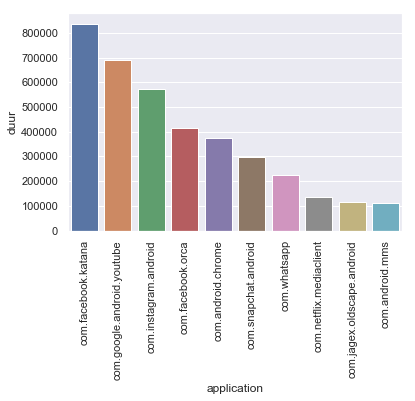

In [343]:
sns.barplot(x="application", y="duur", data=df_top5_A)
plt.xticks(rotation="vertical")

Hoe lang gebruikt elke participant deze 10 applicaties? 

Dus de top 5 die eruit is gekomen:(1) Facebook, (2) Youtube, (3) Instagram, (4) Messenger, (5) Google Chrome

##### (3) aantal appevents per participant, per app_categorie gedeeld door aantal dagen dat categorie gelogd is. 

In [75]:
app_qualtrics_long = df_new.groupby(['ppn','datum'])['qualcatapp'].value_counts().groupby(['ppn','qualcatapp']).mean().to_frame()
app_qualtrics_long.columns = ["mean app events"]

In [76]:
app_qualtricslong = app_qualtrics_long.reset_index()

In [77]:
app_qualtricslong = app_qualtricslong.sort_values(by=["ppn","mean app events"])

### Top 3 applicatiecategorie. 

In [79]:
app_qualtricslong.head()

,ppn,qualcatapp,mean app events
3,1,INTERNET/ZOEK,3.666667
2,1,GAMES,4.153846
4,1,MESSENGERS,7.687500
5,1,SNS,7.941176
1,1,ENTERTAIN,8.000000


In [80]:
app_qualtricslong_3 = app_qualtricslong.groupby('ppn')['mean app events'].nlargest(3).to_frame()

In [81]:
app_qualtricslong_3

mean app events
ppn                     
1   0          32.000000
    1           8.000000
    5           7.941176
2   6         115.142857
    9          89.214286
    10         37.285714
3   14         57.470588
    11         46.058824
    15         37.882353
4   19        101.500000
    20         56.000000
    16         52.916667
5   21        115.529412
    26         67.647059
    25         18.764706
6   27         84.588235
    31         29.529412
    30         22.133333
8   36         59.294118
    37         56.764706
    33         49.411765
9   38         46.294118
    41         27.000000
    42         24.000000
10  43        115.470588
    46         48.235294
    47         31.647059
11  48         54.352941
    50         10.705882
    51          9.647059
...                  ...
27  124       158.117647
    128       130.823529
    127        77.058824
28  129        91.600000
    133        54.083333
    132        24.533333
29  134        58.866667
    136        17.200000
    137         7.733333
31  139        16.214286
    143         5.666667
    141         4.750000
32  148        60.000000
    147        36.200000
    144        24.933333
33  149        60.882353
    153        40.823529
    152        38.823529
34  154        55.294118
    158        35.235294
    155        30.875000
35  162        33.882353
    159        33.235294
    163         8.800000
36  167       116.411765
    164       105.000000
    166        21.000000
38  169        69.375000
    172        44.750000
    173        29.250000

[102 rows x 1 columns]

In [84]:
app_qualtricslong=app_qualtricslong.reset_index()

In [87]:
app_qualtricslong.head()

,index,ppn,qualcatapp,mean app events
0,3,1,INTERNET/ZOEK,3.666667
1,2,1,GAMES,4.153846
2,4,1,MESSENGERS,7.687500
3,5,1,SNS,7.941176
4,1,1,ENTERTAIN,8.000000


In [85]:
app_qualtricslong_3 = app_qualtricslong_3.reset_index()

In [86]:
app_qualtricslong_3.head() 

,index,ppn,level_1,mean app events
0,0,1,0,32.000000
1,1,1,1,8.000000
2,2,1,5,7.941176
3,3,2,6,115.142857
4,4,2,9,89.214286


In [65]:
app_qualtricslong_3.columns = ["ppn","index","mean app events"]

In [88]:
app_qualtricslong_3  = pd.merge(app_qualtricslong_3  , app_qualtricslong[["index","qualcatapp"]], on="index")

In [89]:
app_qualtricslong_3["top"] = ["1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                     "1","2","3","1","2","3","1","2","3","1","2","3"]

In [90]:
app_qualtricslong_3.head()

,index,ppn,level_1,mean app events,qualcatapp,top
0,0,1,0,32.000000,ANDERE,1
1,1,1,1,8.000000,ENTERTAIN,2
2,2,1,5,7.941176,GAMES,3
3,3,2,6,115.142857,INTERNET/ZOEK,1
4,4,2,9,89.214286,MESSENGERS,2


In [91]:
app_qualtricswide_3  = app_qualtricslong_3.pivot(index='ppn', columns='top', values='qualcatapp')

In [92]:
app_qualtricswide_3.to_excel("app_qualtricswide_3.xlsx")

In [546]:
app_qualtrics_wide = app_qualtricslong.pivot(index="ppn", columns="qualcatapp", values = "mean app events")
app_qualtrics_wide

qualcatapp,ANDERE,ENTERTAIN,GAMES,INTERNET/ZOEK,MESSENGERS,SNS
ppn,,,,,,
1,39.470588,8.000000,NaN,3.666667,5.000000,7.941176
2,186.428571,26.071429,NaN,31.857143,19.307692,37.285714
3,73.058824,6.875000,NaN,3.533333,30.470588,37.882353
4,114.333333,9.666667,NaN,4.125000,40.083333,56.000000
5,129.588235,2.400000,NaN,6.687500,9.411765,67.647059
6,121.058824,6.818182,NaN,10.000000,17.058824,19.823529
8,61.294118,2.857143,NaN,3.250000,47.411765,56.764706
9,57.529412,5.533333,NaN,2.083333,15.764706,24.000000
10,140.764706,13.187500,NaN,10.562500,22.941176,31.647059


In [547]:
app_qualtrics_wide.to_excel("appqualtricswide.xlsx")

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 <a list of 17 Text yticklabel objects>)

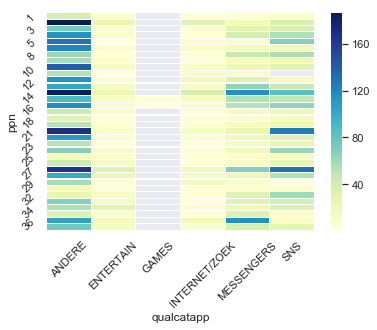

In [553]:
sns.heatmap(app_qualtrics_wide, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [95]:
qualtricscat = df_new.groupby('ppn')['qualcatapp'].value_counts().to_frame()

In [96]:
qualtricscat.columns = ["aantal"]

In [97]:
qualtricscat_long = qualtricscat.reset_index()

In [98]:
qualtricscat_wide = qualtricscat_long.pivot(index='ppn', columns='qualcatapp', values='aantal')

In [99]:
col_list = list(qualtricscat_wide)

In [100]:
qualtricscat_wide["tot"] =  qualtricscat_wide[col_list].sum(axis=1)

In [101]:
col_list

['ANDERE', 'ENTERTAIN', 'GAMES', 'INTERNET/ZOEK', 'MESSENGERS', 'SNS']

In [102]:
qualtricscat_wide["ANDERE_prop"] = qualtricscat_wide["ANDERE"]/qualtricscat_wide["tot"]
qualtricscat_wide["ENTERTAIN_prop"] = qualtricscat_wide["ENTERTAIN"]/qualtricscat_wide["tot"]
qualtricscat_wide["GAMES_prop"] = qualtricscat_wide["GAMES"]/qualtricscat_wide["tot"]
qualtricscat_wide["INTERNET/ZOEK_prop"] = qualtricscat_wide["INTERNET/ZOEK"]/qualtricscat_wide["tot"]
qualtricscat_wide["MESSENGERS_prop"] = qualtricscat_wide["MESSENGERS"]/qualtricscat_wide["tot"]
qualtricscat_wide["SNS_prop"] = qualtricscat_wide["SNS"]/qualtricscat_wide["tot"]

In [103]:
qualtricscat_wide = qualtricscat_wide[["ANDERE_prop","ENTERTAIN_prop","GAMES_prop","INTERNET/ZOEK_prop","MESSENGERS_prop","SNS_prop"]]

In [104]:
qualtrics_wide = qualtricscat_wide[:-3]

In [105]:
qualtrics_wide.columns = ['ANDERE', 'ENTERTAIN', 'GAMES', 'INTERNET/ZOEK', 'MESSENGERS', 'SNS']

In [106]:
qualtrics_wide.to_excel("qualtrics_wide.xlsx")

Dit kan vergeleken worden met de echte vragenlijst 

In [474]:
df_qualtrics = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/qualtrics/qualtricsoriginal.xlsx')

In [475]:
app_qual =  df_qualtrics[["ppn", 'ANDERE', 'ENTERTAIN', 'GAMES', 'INTERNET/ZOEK', 'MESSENGERS', 'SNS']]

In [476]:
qualtrics_wide = qualtrics_wide.reset_index()

In [477]:
matched_apps = qualtrics_wide.append(app_qual)
matched_apps = matched_apps.sort_values(by = "ppn")
matched_apps = matched_apps.set_index('ppn')

In [478]:
matched_apps

,ANDERE,ENTERTAIN,GAMES,INTERNET/ZOEK,MESSENGERS,SNS
ppn,,,,,,
1,0.588745,0.025974,0.058442,0.047619,0.133117,0.146104
1,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
2,0.384359,0.087029,NaN,0.106342,0.297806,0.124464
2,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
3,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
3,0.305025,0.042852,NaN,0.020647,0.380600,0.250877
4,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
4,0.240076,0.032892,NaN,0.012476,0.460491,0.254064
5,0.538968,0.006586,0.012623,0.038694,0.087541,0.315587


In [481]:
matched_apps.to_excel("matched_apps.xlsx")

In [482]:
matched_apps = pd.read_excel("C:/Users/beheerder/matched_apps.xlsx")

In [484]:
matched_apps = matched_apps.set_index("ppn")

In [485]:
heatmap_map_1 = matched_apps.loc[:'19', :]
heatmap_map_2 = matched_apps.loc['21':, :]

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5]),
 <a list of 18 Text yticklabel objects>)

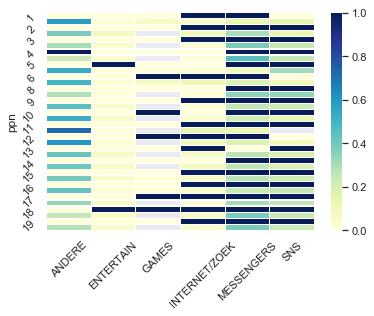

In [488]:
sns.heatmap(heatmap_map_1,cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5]), <a list of 16 Text yticklabel objects>)

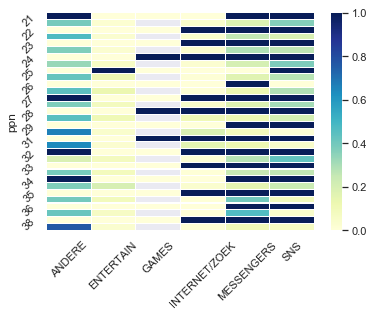

In [489]:
sns.heatmap(heatmap_map_2,cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

Ook dezelfde visualisaties als met de andere categorieën (proportie personen en duur)

In [441]:
app_genre_id_long = df_new.groupby(['ppn','datum'])['qualcatapp'].value_counts().groupby(['ppn','qualcatapp']).mean().to_frame()
app_genre_id_long.columns = ["mean app events"]
app_genre_id_long = app_genre_id_long.reset_index()

In [442]:
qual_cat = app_genre_id_long.reset_index()["qualcatapp"].value_counts().to_frame()

In [444]:
qual_cat = qual_cat.reset_index()

In [445]:
qual_cat.columns = ["qual_cat", "aantal"]

In [446]:
qual_cat["prop"] = qual_cat["aantal"]/34

In [447]:
qual_cat

,qual_cat,aantal,prop
0,ENTERTAIN,34,1.000000
1,ANDERE,34,1.000000
2,INTERNET/ZOEK,34,1.000000
3,MESSENGERS,34,1.000000
4,SNS,33,0.970588
5,GAMES,5,0.147059


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

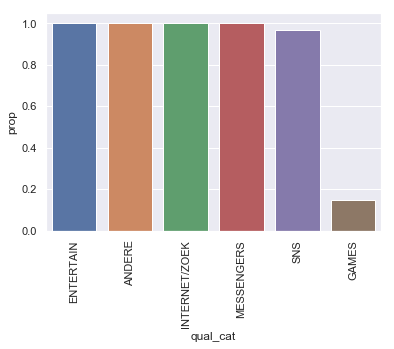

In [449]:
sns.barplot(x="qual_cat", y="prop", data=qual_cat)
plt.xticks(rotation="vertical")

In [450]:
duur = df_new.groupby([ 'qualcatapp'])['duur'].sum().reset_index()

In [455]:
duur = duur.sort_values(by = "duur", ascending = False)
duur

,qualcatapp,duur
5,SNS,1743493.332
0,ANDERE,1495639.791
4,MESSENGERS,920732.447
3,INTERNET/ZOEK,449709.671
1,ENTERTAIN,317311.826
2,GAMES,43968.865


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

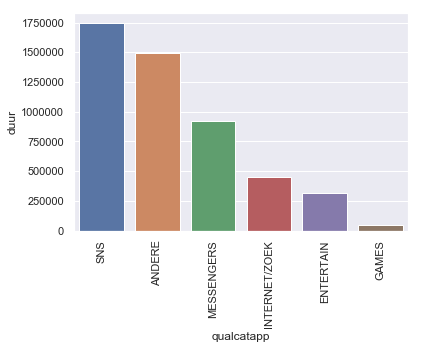

In [456]:
sns.barplot(x="qualcatapp", y="duur", data=duur)
plt.xticks(rotation="vertical")

## NOG VERDER DOEN: Gewoontes in smartphonegebruik: gebruik op school

Afhankelijk van hoe vaak men aangeeft dat men zijn smartphone heeft gebruikt op school (hoeveel dagen in de week?) ~ proportie van aantal sessies terwijl ze op school waren/totale aantal sessies (per dag).

### Welke apps meestal Thuis (gezien als na 8u en voor 18u (gokje))

In [114]:
def moment(row):
    if (row['uur'] < 8.0) | (row['uur'] >= 18.0):
        return 'thuis'
    else:
        return 'school'
df['locatie'] = df.apply(moment, axis=1)

In [115]:
df.head()

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,duur,day,moment,uur,uurblok,app_genre_id,app_name,datum,qualcatapp,locatie
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,7.0,WEEK,19.0,18U-23U,SOCIAL,Instagram,2018-11-07,SNS,thuis
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,7.0,WEEK,19.0,18U-23U,unknown,unknown,2018-11-07,ANDERE,thuis
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,7.0,WEEK,23.0,23U-5U,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07,MESSENGERS,thuis


In [113]:
df2 = pd.DataFrame(df[['ppn','session','application','locatie','uur']])
appsThuis = df2[df2.locatie == 'thuis']
appsSchool = df2[df2.locatie == 'school']

df3 = pd.DataFrame(appsThuis.groupby('application')['session'].count())
thuis = df3.sort_values('session', ascending=False)[:10]
df3 = pd.DataFrame(appsSchool.groupby('application')['session'].count())
school = df3.sort_values('session', ascending=False)[:10]

In [115]:
thuis.sum()

session    25848
dtype: int64

In [116]:
thuis["proportie"] = thuis["session"]/25848

In [117]:
school.sum()

session    33341
dtype: int64

In [118]:
school["proportie"] = school["session"]/33341

In [119]:
thuis

,session,proportie
application,,
com.facebook.orca,4850,0.187635
com.facebook.katana,3897,0.150766
com.android.systemui,3886,0.150340
com.instagram.android,3028,0.117146
com.snapchat.android,2314,0.089523
com.android.mms,2079,0.080432
com.whatsapp,1849,0.071534
com.android.chrome,1800,0.069638
com.spotify.music,1075,0.041589


In [120]:
school

,session,proportie
application,,
com.facebook.orca,6474,0.194175
com.facebook.katana,5446,0.163342
com.android.systemui,5103,0.153055
com.instagram.android,3531,0.105906
com.android.mms,2448,0.073423
com.snapchat.android,2400,0.071983
com.whatsapp,2390,0.071684
com.android.chrome,2389,0.071654
com.spotify.music,2087,0.062596


In [169]:
df2 = pd.DataFrame(df[['ppn','session','application','locatie','uur']])
appsThuis = df2[df2.locatie == 'thuis']
appsSchool = df2[df2.locatie == 'school']

In [170]:
df3 = pd.DataFrame(appsThuis.groupby(['ppn', 'application'])['session'].count())
thuis_ppn = df3.sort_values('ppn', ascending=True)

In [173]:
thuis_ppn=thuis_ppn.reset_index()

In [174]:
thuis_ppn_3 = thuis_ppn.groupby("ppn")["session"].nlargest(3).to_frame()

In [178]:
thuis_ppn_3=thuis_ppn_3.reset_index()

In [180]:
thuis_ppn_3.columns = ["ppn", "index", "session"]

In [181]:
thuis_ppn_3.head()

,ppn,index,session
0,1,2,155
1,1,8,58
2,1,12,27
3,2,67,461
4,2,38,270


In [183]:
thuis_ppn=thuis_ppn.reset_index()

In [184]:
thuis_ppn.head()

,index,ppn,application,session
0,0,1,android,2
1,1,1,de.hafas.android.sncbnmbs,1
2,2,1,com.tinder,155
3,3,1,com.spotify.music,1
4,4,1,com.snapchat.android,5


In [185]:
thuis_top_3 = pd.merge(thuis_ppn_3, thuis_ppn[['application']], left_on='index', right_index=True)

In [187]:
thuis_top_3["top"] = ["1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                     "1","2","3","1","2","3","1","2","3","1","2","3"]

In [189]:
thuis_top_3_wide = thuis_top_3.pivot(index='ppn', columns='top', values='application')

In [190]:
thuis_top_3_wide.to_excel("thuis_top_3_wide.xlsx")

In [191]:
df3 = pd.DataFrame(appsSchool.groupby(['ppn', 'application'])['session'].count())
school_ppn = df3.sort_values('ppn', ascending=True)

In [192]:
school_ppn=school_ppn.reset_index()
school_ppn_3 = school_ppn.groupby("ppn")["session"].nlargest(3).to_frame()
school_ppn_3=school_ppn_3.reset_index()
school_ppn_3.columns = ["ppn", "index", "session"]
school_ppn_3.head()
school_ppn=school_ppn.reset_index()
school_ppn.head()
school_top_3 = pd.merge(school_ppn_3, school_ppn[['application']], left_on='index', right_index=True)
school_top_3["top"] = ["1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                      "1","2","3","1","2","3","1","2","3","1","2","3","1","2","3","1","2","3",
                     "1","2","3","1","2","3","1","2","3","1","2","3"]
school_top_3_wide = school_top_3.pivot(index='ppn', columns='top', values='application')

In [194]:
school_top_3_wide.to_excel("school_top_3_wide.xlsx")

In [130]:
thuis_ppn

,,session
ppn,application,
36,com.whatsapp,662
14,com.facebook.orca,544
15,com.facebook.orca,474
2,com.android.mms,461
5,com.instagram.android,446
16,com.facebook.orca,430
27,com.facebook.katana,420
21,com.snapchat.android,410
27,com.instagram.android,407


In [ ]:
Dit is nu puur een subjectieve indicatie van school tov thuis. 

Per participant kan volgens deze indicatie ook proportie app events berekend worden. 

## Als maat van multitasking 

In [197]:
df2.head()

,ppn,session,application,locatie,uur
0,1,1.541525e+09,com.tinder,thuis,18.0
1,1,1.541526e+09,com.tinder,thuis,18.0
2,1,1.541615e+09,com.instagram.android,thuis,19.0
3,1,1.541615e+09,com.android.systemui,thuis,19.0
4,1,1.541628e+09,com.facebook.orca,thuis,23.0


In [198]:
df2.groupby(['ppn', 'locatie'])["session"].count().groupby(['ppn', 'locatie']).mean()

ppn  locatie
1    school      516
     thuis       412
2    school     2270
     thuis      1932
3    school     1369
     thuis      1213
4    school     1463
     thuis      1199
5    school     1974
     thuis      1839
6    school     1744
     thuis      1193
8    school     1681
     thuis      1257
9    school     1139
     thuis       686
10   school     2149
     thuis      1636
11   school      847
     thuis       432
12   school     2121
     thuis      1100
13   school     2686
     thuis      1459
14   school     4820
     thuis      3027
15   school     2000
     thuis      2158
16   school     2431
     thuis      2133
                ... 
23   thuis       676
24   school     1709
     thuis      1187
25   school      325
     thuis       151
26   school      895
     thuis       795
27   school     3936
     thuis      3325
28   school     1842
     thuis      1228
29   school      576
     thuis       793
31   school      137
     thuis       228
32   school     1027


Hoe kan je daar nu een betrouwbare maat van maken? proportioneel correct? 

## Multitasking

Idee om multitasking aan te pakken: 
(1) Multitasking wordt gezien als het feit van smartphone multitasking: namelijk het gebruik van de smartphone terwijl de participanten eigenlijk aangeven dat ze op school zijn én dat de coordinaten inderdaad bevestigen dat ze op school zijn.</li> 
<li> Via de agenda krijgen we op maximaal een half uur nauwkeurigheid of ze op school waren: natuurlijk is het zelfrapportage en speelt sociale wenselijkheid daar een rol.</li> <br>
    => agenda toekennen gebeurt: op basis van "day", "uur" en "minuut" (deze laatste nog eruit halen)
<li> Via de coördinaten kun je een tweede kolom aangeven of ze op school of thuis waren. De dagen in het weekend moeten al niet bekeken worden.</li>
<li> daarna worden de 2 kolommen vergeleken; als beide kolommen aangeven dat ze op school "zouden moeten zijn" heb je een check dat ze inderdaad op school waren.</li>
Per participant wordt dan gekeken hoeveel appevents ze gemiddeld hebben wanneer ze op school zijn (gedeeld door het aantal uren en dagen dat ze op school zijn geweest zodat iemand die meer op school was ook niet als meer multitasker wordt gezien.)


In [116]:
df_new.head()

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,duur,day,moment,uur,uurblok,app_genre_id,app_name,datum,qualcatapp,locatie
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,7.0,WEEK,19.0,18U-23U,SOCIAL,Instagram,2018-11-07,SNS,thuis
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,7.0,WEEK,19.0,18U-23U,unknown,unknown,2018-11-07,ANDERE,thuis
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,0.0,7.0,WEEK,23.0,23U-5U,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07,MESSENGERS,thuis


### Minuut moet toegevoegd worden aan de dataframe

In [117]:
df_new["minuut"] = df_new.startTime.dt.minute

In [140]:
def minuutindeling(row):
    if (row["minuut"] >= 30):
        return "30"
    else:
        return "00"

In [141]:
df_new["minuutblok"] = df_new.apply(minuutindeling, axis=1)

### Agenda inlezen en in wide format zetten. (1) kolom "ppn", (2) kolom "moment", (3) activiteit

informatie in kolom "moment": titel staat voor het eindmoment van dat blok. bvb. 00u30 loopt van 00u00 tot 00u30.

In [142]:
agenda_wide = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/agenda.xlsx")

In [143]:
agenda_wide.head(5)

,ppn,5/11 00u30,5/11 1u00,5/11 1u30,5/11 2u00,5/11 2u30,5/11 3u00,5/11 3u30,5/11 4u00,5/11 4u30,...,16/11 19u00,16/11 19u30,16/11 20u00,16/11 20u30,16/11 21u00,16/11 21u30,16/11 22u00,16/11 22u30,16/11 23u00,16/11 23u30
0,1,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
1,2,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
2,3,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
3,4,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
4,5,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/


In [144]:
agenda_long = pd.melt(agenda_wide, id_vars = ["ppn"], var_name = "moment", value_name = "activiteit")

In [145]:
agenda_long.head(5)

,ppn,moment,activiteit
0,1,5/11 00u30,/
1,2,5/11 00u30,/
2,3,5/11 00u30,/
3,4,5/11 00u30,/
4,5,5/11 00u30,/


In [146]:
agenda_long.dtypes

ppn            int64
moment        object
activiteit    object
dtype: object

#### De "moment" kolom moet gesplitst worden om zo dag, uur en minuut eruit te halen. 

(1) splits te de kolom obv een spatie in dag en tijdstip. 

In [147]:
stap1 = agenda_long["moment"].str.split(' ', 1, expand = True).rename(columns ={0: "datum", 1:"tijdstip"})

(2) splits de datum kolom puur in dag obv '/'

In [148]:
stap2 = stap1["datum"].str.split('/',1,expand=True).rename(columns={0:'dag', 1:'maand'})
stap2.head(5)

,dag,maand
0,5,11
1,5,11
2,5,11
3,5,11
4,5,11


(3) splits de tijdstip kolom in uur (voor u) en minuut (na u)

In [149]:
stap3 = stap1["tijdstip"].str.split('u',1,expand=True).rename(columns={0:'uur', 1:'minuut'})

(4) Zet die drie dataframes samen. 

In [150]:
agenda_long = pd.concat([stap1, stap2, stap3, agenda_long], axis=1)

In [151]:
agenda_long.head(5)

,datum,tijdstip,dag,maand,uur,minuut,ppn,moment,activiteit
0,5/11,00u30,5,11,00,30,1,5/11 00u30,/
1,5/11,00u30,5,11,00,30,2,5/11 00u30,/
2,5/11,00u30,5,11,00,30,3,5/11 00u30,/
3,5/11,00u30,5,11,00,30,4,5/11 00u30,/
4,5/11,00u30,5,11,00,30,5,5/11 00u30,/


In [152]:
agenda_long = agenda_long[["ppn", "dag","uur", "minuut", "activiteit"]]

In [153]:
agenda_long.columns = ["ppn", "day", "uur", "minuutblok", "activiteit"]

In [154]:
agenda_long.head()

,ppn,day,uur,minuutblok,activiteit
0,1,5,00,30,/
1,2,5,00,30,/
2,3,5,00,30,/
3,4,5,00,30,/
4,5,5,00,30,/


In [155]:
agenda_long["day"] = agenda_long["day"].astype(int) 

In [157]:
agenda_long["uur"]=agenda_long["uur"].astype(int)

In [156]:
agenda_long["minuutblok"] = agenda_long["minuutblok"].astype(int) 

In [158]:
df_new.head()

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,moment,uur,uurblok,app_genre_id,app_name,datum,qualcatapp,locatie,minuut,minuutblok
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis,31.0,30
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis,34.0,30
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,19.0,18U-23U,SOCIAL,Instagram,2018-11-07,SNS,thuis,24.0,00
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,19.0,18U-23U,unknown,unknown,2018-11-07,ANDERE,thuis,38.0,30
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.540000e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,23.0,23U-5U,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07,MESSENGERS,thuis,4.0,00


##### de twee datasets mergen: 

In [159]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101531 entries, 0 to 101530
Data columns (total 27 columns):
ppn                101531 non-null int64
application        95670 non-null object
battery            95670 non-null float64
data_version       95670 non-null float64
endTime            95670 non-null datetime64[ns]
endTimeMillis      95670 non-null float64
id                 95670 non-null object
latitude           95670 non-null float64
longitude          95670 non-null float64
model              95670 non-null object
notification       95670 non-null object
session            95670 non-null float64
startTime          95670 non-null datetime64[ns]
startTimeMillis    95670 non-null float64
dag                95670 non-null object
duur               95670 non-null float64
day                95670 non-null float64
moment             101531 non-null object
uur                95670 non-null float64
uurblok            95670 non-null object
app_genre_id       101531 non-null object


In [161]:
df_new = df_new.iloc[0:95671]

In [163]:
df_new["minuutblok"] = df_new["minuutblok"].astype(int)

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
toegevoegdeagende = pd.merge(df_new, agenda_long, on=['ppn', 'day', 'uur', 'minuutblok'])

In [168]:
toegevoegdeagende.to_excel("dataset_metagenda.xlsx")

voor multitasking deze agenda nu gebruiken. 

In [169]:
df_new = toegevoegdeagende

### Adres van coördinaten berekenen. 

In [2]:
df_new = pd.read_excel("C:/Users/beheerder/dataset_metagenda.xlsx")

In [3]:
from geopy.geocoders import Nominatim

In [4]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderServiceError

In [7]:
from geopy.extra.rate_limiter import RateLimiter

In [8]:
geolocator = Nominatim()

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


#### Eerst alle coordinaten als string krijgen om dan in de gelocator functie in te putten. 

In [9]:
df_new["coordinaten"] = df_new["latitude"].astype(str)+','+ df_new["longitude"].astype(str)

#### Per locatie adres krijgen. 

In [10]:
geocode=RateLimiter(geolocator.reverse, min_delay_seconds=1)
def coordinaten(row):
    global location
    if ((row["latitude"] != 0) & (row["longitude"] != 0)) & (row["moment"] == "WEEK") & ((row["uur"] > 8) & (row["uur"] < 19)):
        try:
            location = geocode(row["coordinaten"], addressdetails = True)
            return location.address
        except:
            if log is 1:
                print("Error: geocode failed on input (%s, %s)" % (la, lo), e)
            location = np.nan
    elif ((row["latitude"] == 0) & (row["longitude"] == 0)):
        return "no COO"
    elif (row["moment"]=="WEEKEND"):
        return "weekend"
    elif (row["uur"] < 8):
        return "ochtend"
    else:
        return "avond"

In [76]:
geocode=RateLimiter(geolocator.reverse, min_delay_seconds=1)
def coordinatenshort(row):
    global location
    if ((row["latitude"] != 0) & (row["longitude"] != 0)) & (row["moment"] == "WEEK") & ((row["uur"] > 8) & (row["uur"] < 19)):
            location = geocode(row["coordinaten"], addressdetails = True)
            return location.address

##### TEST

In [50]:
short = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/coo_test.csv"

In [51]:
df_short = pd.read_csv(short, sep=";", parse_dates=['startTime', 'endTime'])

In [52]:
df_short.drop("Unnamed: 0", axis=1, inplace=True)
df_short['startTime'] = pd.to_datetime(df_short['startTime'])
df_short['endTime'] = pd.to_datetime(df_short['endTime'])

In [53]:
df_short.head()

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis
0,2,com.android.mms,73,1.4,2018-11-01 21:14:41.147,1.541100e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541103207,2018-11-01 21:13:29.128,1.541100e+12
1,2,com.android.mms,73,1.4,2018-11-01 21:17:02.840,1.541100e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541103420,2018-11-01 21:17:02.839,1.541100e+12
2,2,com.android.mms,73,1.4,2018-11-01 21:31:04.632,1.541100e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541104260,2018-11-01 21:31:02.238,1.541100e+12
3,2,com.fwc2014.vrt.and,74,1.4,2018-11-01 23:48:49.731,1.541110e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541112425,2018-11-01 23:47:11.866,1.541110e+12
4,2,com.google.android.calendar,35,1.4,2018-11-01 12:42:59.226,1.541070e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.210625,4.127238,ONEPLUS A3003,False,1541072575,2018-11-01 12:42:58.322,1.541070e+12


In [54]:
df_short['day'] = df_short.startTime.dt.day

In [55]:
df_short["uur"] = df_short.startTime.dt.hour
df_short['moment'] = np.where((df_short.day == 3)|(df_short.day == 4)|(df_short.day==10)|(df_short.day==11)|(df_short.day==17)|(df_short.day==18), 'WEEKEND', 'WEEK')
df_short["coordinaten"] = df_short["latitude"].astype(str)+','+ df_short["longitude"].astype(str)

In [82]:
df_short["adres"] = df_short.apply(coordinaten, axis=1)

In [83]:
df_short

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,day,uur,moment,coordinaten,adres
0,2,com.android.mms,73,1.4,2018-11-01 21:14:41.147,1.541100e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541103207,2018-11-01 21:13:29.128,1.541100e+12,1,21,WEEK,"51.14956420000001,4.0963559",avond
1,2,com.android.mms,73,1.4,2018-11-01 21:17:02.840,1.541100e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541103420,2018-11-01 21:17:02.839,1.541100e+12,1,21,WEEK,"51.14956420000001,4.0963559",avond
2,2,com.android.mms,73,1.4,2018-11-01 21:31:04.632,1.541100e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541104260,2018-11-01 21:31:02.238,1.541100e+12,1,21,WEEK,"51.14956420000001,4.0963559",avond
3,2,com.fwc2014.vrt.and,74,1.4,2018-11-01 23:48:49.731,1.541110e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541112425,2018-11-01 23:47:11.866,1.541110e+12,1,23,WEEK,"51.14956420000001,4.0963559",avond
4,2,com.google.android.calendar,35,1.4,2018-11-01 12:42:59.226,1.541070e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.210625,4.127238,ONEPLUS A3003,False,1541072575,2018-11-01 12:42:58.322,1.541070e+12,1,12,WEEK,"51.210624700000004,4.1272381000000005","Doornstraat, Sint-Gillis-Waas, Sint-Niklaas, O..."
5,2,com.whatsapp,31,1.4,2018-11-01 12:52:27.650,1.541070e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.210625,4.127238,ONEPLUS A3003,True,1541072965,2018-11-01 12:51:33.290,1.541070e+12,1,12,WEEK,"51.210624700000004,4.1272381000000005","Doornstraat, Sint-Gillis-Waas, Sint-Niklaas, O..."
6,2,com.microsoft.office.outlook,31,1.4,2018-11-01 13:01:47.468,1.541070e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.210625,4.127238,ONEPLUS A3003,False,1541073338,2018-11-01 13:01:21.506,1.541070e+12,1,13,WEEK,"51.210624700000004,4.1272381000000005","Doornstraat, Sint-Gillis-Waas, Sint-Niklaas, O..."
7,2,com.google.android.packageinstaller,31,1.4,2018-11-01 13:22:15.279,1.541070e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.210625,4.127238,ONEPLUS A3003,False,1541074907,2018-11-01 13:22:15.198,1.541070e+12,1,13,WEEK,"51.210624700000004,4.1272381000000005","Doornstraat, Sint-Gillis-Waas, Sint-Niklaas, O..."
8,2,com.oneplus.deskclock,100,1.4,2018-11-02 07:15:30.021,1.541140e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,False,1541139300,2018-11-02 07:15:30.020,1.541140e+12,2,7,WEEK,"51.14956420000001,4.0963559",ochtend
9,2,be.irm.kmi.meteo,100,1.4,2018-11-02 07:16:47.863,1.541140e+12,a0d70d38-201b-49ad-b700-22d84f037555,51.149564,4.096356,ONEPLUS A3003,True,1541139348,2018-11-02 07:16:13.596,1.541140e+12,2,7,WEEK,"51.14956420000001,4.0963559",ochtend


In [298]:
df_short.to_excel("df_short.xlsx")

### voor echt: participant per participant en daarna die datasets samenvoegen

In [26]:
df_new["adres"] = df_new.apply(coordinaten, axis=1)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('51.0466925,3.6989717',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "C:\Users\beheerder\Anaconda3\lib\urllib\request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "C:\Users\beheerder\Anaconda3\lib\http\client.py", line 1229, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "C:\Users\beheerder\Anaconda3\lib\http\client.py", line 1275, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "C:\Users\beheerder\Anaconda3\lib\http\client.py", line 1224, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "C:\Users\beheerder\Anaconda3\lib\http\client.py", line 1016, in _send_output
    self.send(msg)
  File "C:\Users\beheerder\Anaconda3\lib\http\client.py", line 956, in send
    self.connect()
  File "C:\Users\beheerder\Anaconda3\lib\http\client.py", line 138

In [27]:
df_new

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,app_genre_id,app_name,datum,qualcatapp,locatie,minuut,minuutblok,activiteit,coordinaten,adres
0,1,com.tinder,67,1.4,2018-11-06 18:31:18.495,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis,31,30,/,"0.0,0.0",no COO
1,1,com.tinder,67,1.4,2018-11-06 18:36:03.063,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis,34,30,/,"0.0,0.0",no COO
2,1,com.android.incallui,67,1.4,2018-11-06 18:31:16.755,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,unknown,unknown,2018-11-06,ANDERE,thuis,31,30,/,"0.0,0.0",no COO
3,1,com.tinder,65,1.4,2018-11-06 18:58:09.156,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,LIFESTYLE,Tinder,2018-11-06,ANDERE,thuis,58,30,/,"0.0,0.0",no COO
4,1,com.instagram.android,65,1.4,2018-11-06 18:58:42.191,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,SOCIAL,Instagram,2018-11-06,SNS,thuis,58,30,/,"0.0,0.0",no COO
5,1,com.instagram.android,73,1.4,2018-11-07 19:24:56.992,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,SOCIAL,Instagram,2018-11-07,SNS,thuis,24,0,gestudeerd,"0.0,0.0",no COO
6,1,com.instagram.android,73,1.4,2018-11-07 19:30:09.801,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,SOCIAL,Instagram,2018-11-07,SNS,thuis,24,0,gestudeerd,"0.0,0.0",no COO
7,1,com.facebook.katana,74,1.4,2018-11-07 19:21:16.844,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,SOCIAL,Facebook,2018-11-07,SNS,thuis,21,0,gestudeerd,"0.0,0.0",no COO
8,1,com.facebook.katana,74,1.4,2018-11-07 19:24:43.432,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,SOCIAL,Facebook,2018-11-07,SNS,thuis,21,0,gestudeerd,"0.0,0.0",no COO
9,1,com.android.systemui,69,1.4,2018-11-07 19:38:12.620,1540000000000,8a2f0420-8011-4adc-b128-95a40786d765,0.000000,0.000000,HUAWEI NMO-L31,...,unknown,unknown,2018-11-07,ANDERE,thuis,38,30,/,"0.0,0.0",no COO


In [38]:
df_new["adres"].value_counts()

no COO                                                                                                                                                          37179
avond                                                                                                                                                            9001
ochtend                                                                                                                                                          2212
Faculteit psychologie en pedagogische wetenschappen (FPPW), Henri Dunantlaan, Ekkergem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien     1209
Balgerhoeke Kerk, Balgerhoeke, Eeklo, Oost-Vlaanderen, Vlaanderen, 9900, België / Belgique / Belgien                                                             1066
66, Provincialeweg, Groede, Sluis, Zeeland, Nederland, 4503GG, Nederland                                                                                         1001
7C, 

In [43]:
adressen = df_new.groupby(['ppn', 'adres'])['adres'].count().to_frame()

In [47]:
adressen.columns = ["aantal"]

In [48]:
adressen = adressen.reset_index()

In [52]:
adressen = adressen.sort_values(by=["ppn", "aantal"], ascending=False)

In [59]:
lijst_to_group = df_new.groupby(["adres"])["adres"].count().to_frame().sort_values(by=["adres"], ascending=False)

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'adres' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [60]:
lijst_to_group.to_excel("lijstadressen.xlsx")

In [66]:
def cooschool(row):
    if (row['adres'] ==  ('Faculteit psychologie en pedagogische wetenschappen (FPPW), Henri Dunantlaan, Ekkergem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
        return "school"
    elif (row['adres']==('UGent Campus Dunant, Watersportlaan, Ekkergem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
        return "school"
    elif (row['adres']==('UFO, 33, Sint-Pietersnieuwstraat, Kunstenkwartier, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
        return "school"
    elif (row['adres']==('Arteveldehogeschool campus Mariakerke, 232, Industrieweg, Planetenwijk, Mariakerke, Gent, Oost-Vlaanderen, Vlaanderen, 9030, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Odisee, 1, Gebroeders De Smetstraat, Rabot, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
        return "school"
    elif (row['adres']==('Blandijn, Blandijnberg, Kunstenkwartier, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('UGent Campus Boekentoren, Jozef Plateaustraat, Kunstenkwartier, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('AZ Jan Palfijn site Watersportbaan, 5, Henri Dunantlaan, Ekkergem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('S25, Galglaan, Zwijnaardse Dries, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('S5, Krijgslaan, Sint-Pieters-Aalst, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('UZ Gent, 185, De Pintelaan, Zwijnaardse Dries, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Arteveldehogeschool campus Watersportbaan, Henri Dunantlaan, Ekkergem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('UGent Campus Tweekerken, Hoveniersberg, Kunstenkwartier, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Industrieweg, Wondelgem, Gent, Oost-Vlaanderen, Vlaanderen, 9032, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Blok F, Bargiekaai, Elisabethbegijnhof, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Ter Groene Poorte, Spoorwegstraat, Sint-Michiels, Brugge, West-Vlaanderen, Vlaanderen, 8200, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('904, Technologiepark-Zwijnaarde, Rijvissche, Zwijnaarde, Gent, Oost-Vlaanderen, Vlaanderen, 9052, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Instituut voor Verpleegkunde Sint-Vincentius campus Molenaarsstraat, 22, Molenaarsstraat, Prinsenhof, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Howest, 5, Graaf Karel de Goedelaan, Begijnhof Sint-Elisabeth, Kortrijk, West-Vlaanderen, Vlaanderen, 8500, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('HoGent/UGent Campus Schoonmeersen, Valentin Vaerwyckweg, Sint-Pieters-Aaigem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('K12F, Corneel Heymanslaan, Ottergemse Dries, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Gebouw B, Binnenring-Sint-Denijs, Sint-Pieters-Aaigem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Arteveldehogeschool Campus Mariakerke, 232, Industrieweg, Planetenwijk, Mariakerke, Gent, Oost-Vlaanderen, Vlaanderen, 9030, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('School van Onze-Lieve-Vrouw Visitatie, 8, Onderstraat, St. Jacobs, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('K12C, Langen Cauterweg, Ottergemse Dries, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('UGent Campus Sterre, 281, Krijgslaan, Sint-Pieters-Aalst, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('KASK, Jozef Kluyskensstraat, Papegaai, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('KTA MoBi, Coupure Rechts, Papegaai, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('K12E, Corneel Heymanslaan, Ottergemse Dries, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Mercator Gebouw B, Groot-Brittanniëlaan, Stationsbuurt Noord, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('UGent Campus Ufo, Kerkwegel, Kunstenkwartier, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('VISO Mariakerke, 230, Industrieweg, Planetenwijk, Mariakerke, Gent, Oost-Vlaanderen, Vlaanderen, 9030, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('CVO MIRAS, 1, Burgemeester Lambrechtlaan, Begijnhof Sint-Elisabeth, Kortrijk, West-Vlaanderen, Vlaanderen, 8500, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Blok A, Coupure Links, Papegaai, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
         return "school"
    elif (row['adres']==('Cambio ICC/Plantentuin, Karel Lodewijk Ledeganckstraat, Strop, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
        return "school"
    elif (row['adres']==('10, Antonius Triestlaan, Ekkergem, Gent, Oost-Vlaanderen, Vlaanderen, 9000, België / Belgique / Belgien')):
        return "school"
    elif (row['adres']==('no COO')):
        return "no coo"
    else: 
        return "skip"

In [67]:
df_new["school_coo"] = df_new.apply(cooschool, axis=1)

In [68]:
df_new.to_excel('dataset_coordinaten_school.xlsx')

#### kolom school (agenda) vergelijken met kolom school (coordinaten) => SCHOOL

#### Per participant: gemiddelde aantal app-events per dag op "school"

#### Is iemand die hoger score heeft voor die app-events op school ook iemand die een grotere multitasking preference aangeeft? 

## Multitasking ook eens gewoon definiëren als gemiddeld aantal switches 

## Multitasking als aantal appevents per sessie

In [522]:
# Gemiddeld aantal appevents per sessie + gemiddelde aantal unieke appevents per sessie
multitaskingevents = df_new.groupby(['ppn','session']).agg({'application': ['count','nunique']}).groupby('ppn').mean().rename(columns={'count': 'gem', 'nunique': 'gem_uniek'})
multitaskingevents.head(5)

application          
            gem gem_uniek
ppn                      
1      2.397933  1.568475
2      6.866013  2.019608
3      2.785329  1.839266
4      3.516513  1.859974
5      2.378665  1.606987

In [523]:
multitaskingevents.describe()

application           
              gem  gem_uniek
count   34.000000  34.000000
mean     2.560279   1.715649
std      0.919999   0.191162
min      1.593443   1.300546
25%      2.141947   1.599508
50%      2.360955   1.685289
75%      2.800973   1.840807
max      6.866013   2.330579

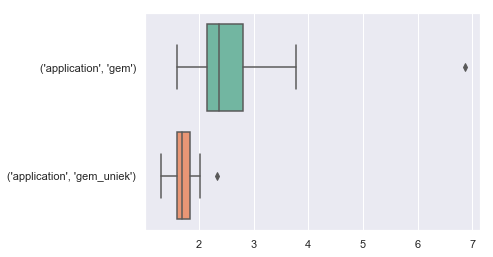

In [524]:
sns.boxplot(data=multitaskingevents, orient="h", palette="Set2")

In [258]:
multitaskingevents.to_excel("multitaskingevents.xlsx")

##### Dit zijn waarden om op te slaan in Excel. 

In [51]:
multitaskingevents["application"]["gem"].describe()

count    34.000000
mean      2.560279
std       0.919999
min       1.593443
25%       2.141947
50%       2.360955
75%       2.800973
max       6.866013
Name: gem, dtype: float64

In [52]:
multitaskingevents["prop"]  = multitaskingevents["application"]["gem"]/multitaskingevents["application"]["gem_uniek"]

In [53]:
multitaskingevents.head(5)

application                prop
            gem gem_uniek          
ppn                                
1      2.397933  1.568475  1.528830
2      6.866013  2.019608  3.399676
3      2.785329  1.839266  1.514370
4      3.516513  1.859974  1.890625
5      2.378665  1.606987  1.480202

### Link multitasking op smartphone tov multitasking preference vragenlijst

In [57]:
df_qualtrics["ppn"]

0      1
1      2
2      3
3      4
4      5
5      6
6      8
7      9
8     10
9     11
10    12
11    13
12    14
13    15
14    16
15    17
16    18
17    19
18    20
19    21
20    22
21    23
22    24
23    25
24    26
25    27
26    28
27    29
28    31
29    32
30    33
31    34
32    35
33    36
34    38
35    39
36    40
37    41
38    42
39    43
Name: ppn, dtype: int64

In [ ]:
df.drop(df.index[2])

In [61]:
df_qualtrics = df_qualtrics.drop(df_qualtrics.index[18])

In [62]:
df_qualtrics = df_qualtrics[:-5]

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


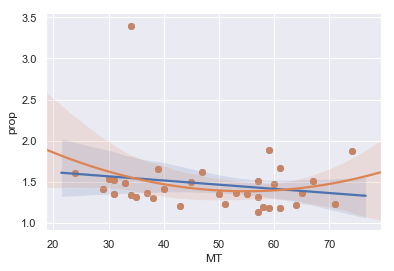

In [63]:
sns.regplot(df_qualtrics["MT"],  multitaskingevents["prop"]);
sns.regplot(df_qualtrics["MT"],  multitaskingevents["prop"], order=2)

### Multitasking als de proportie van singleapp sessions tov sessions met minsten 2 of 2

##### Je kan verschillende verhoudingen gaan berekenen per participant.

Obv appevents als df. 

In [544]:
#TODO: aantal singleapp sessions vs sessions met minstens 2
dfses = df_new.groupby(['ppn', 'session'])['application'].count().reset_index()

Om de proportie te berekenen moeten we dus weten hoeveel appevents per sessie dat er in totaal geregistreerd zijn om dan de proportie te berekenen; want proportie = singleappsessions / more app sessions (totaal - single)

In [545]:
Tot = dfses.groupby(['ppn']).size().to_frame()

In [546]:
Tot = Tot.reset_index()

In [547]:
Tot.columns = ["ppn", "totale app events"]

In [559]:
sessioncount = dfses.groupby(['ppn', 'application']).size().to_frame().reset_index()

voor de singleapp-events wil je enkel maar die die voldoen aan de conditie application==1

In [560]:
singleapp = sessioncount[sessioncount['application'] == 1]
singleapp.head(5)

,ppn,application,0
0,1,1,179
13,2,1,255
34,3,1,393
60,4,1,325
88,5,1,935


In [550]:
singleapp.columns = ["ppn", "application", "single_app"]

In [531]:
singleapp.head(5)

,ppn,application,single_app
0,1,1,179
13,2,1,255
34,3,1,393
60,4,1,325
88,5,1,935


In [551]:
singleapp = singleapp[["ppn", "single_app"]]

In [576]:
grddrie = sessioncount[sessioncount['application'] > 3]

In [577]:
grddrie.columns = ["ppn", "applicatie", "aantal"]

In [578]:
grddrie_wide = grddrie.pivot(index='ppn', columns='applicatie', values='aantal')

In [579]:
col_list = list(grddrie_wide)

In [580]:
grddrie_wide["tot"] =  grddrie_wide[col_list].sum(axis=1)

In [581]:
grddrie_wide.head()

applicatie,4,5,6,7,8,9,10,11,12,13,...,80,84,85,89,98,102,106,112,2365,tot
ppn,,,,,,,,,,,,,,,,,,,,,
1,29.0,13.0,7.0,8.0,3.0,2.0,3.0,2.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0
2,45.0,23.0,25.0,15.0,16.0,6.0,2.0,2.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,151.0
3,66.0,33.0,22.0,12.0,10.0,4.0,10.0,6.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0
4,58.0,29.0,26.0,26.0,17.0,12.0,7.0,8.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0
5,71.0,37.0,32.0,21.0,15.0,9.0,11.0,4.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.0


In [582]:
grddrie_wide = grddrie_wide[["tot"]]

In [583]:
grddrie_wide = grddrie_wide.reset_index()

In [588]:
proportie = singleapp.merge(grddrie_wide, on='ppn', how='right')

In [590]:
proportie.columns = ["ppn", "aantal", "singleapp","plusdrieapp"]

In [591]:
proportie = proportie[["ppn", "singleapp", "plusdrieapp"]]

In [592]:
proportie["prop"] = proportie["singleapp"]/proportie["plusdrieapp"]

In [593]:
proportie.describe()

,ppn,singleapp,plusdrieapp,prop
count,34.000000,34.000000,34.000000,34.000000
mean,19.029412,589.411765,183.529412,3.930214
std,10.994448,331.143301,124.349029,2.335160
min,1.000000,110.000000,19.000000,1.247619
25%,10.250000,356.250000,86.750000,2.368479
50%,18.500000,525.000000,159.500000,3.641026
75%,27.750000,794.500000,236.000000,4.086857
max,38.000000,1369.000000,552.000000,11.745455


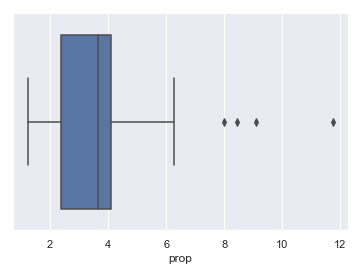

In [595]:
sns.boxplot(x=proportie["prop"])

hoe kleiner de prop waarde, hoe meer appevents per sessie er voorkwamen, dus hoe meer treintjesgedrag iemand vertoond. 

In [623]:
treintjes.to_excel("treintjes.xlsx")

Dit is in een interessante kolom: je krijgt een idee van hoeveel apps ze gemiddeld gaan gebruiken tijdens een sessie (treintjes gedrag)

## Ratio van sessie gestart met notificatie

Dus dit kan je weten uit de MobileDNA data van de appevents aangezien "notifications (True/False)" aangeeft of de sessie gestart is vanuit een notificatie. 

In [596]:
ratio_not_long = df_new.groupby(['ppn','notification']).size().to_frame().reset_index()

In [597]:
ratio_not_long.head(5)

,ppn,notification,0
0,1,0.0,855
1,1,1.0,73
2,2,0.0,3991
3,2,1.0,211
4,3,0.0,2185


In [598]:
ratio_not_long.columns = ["ppn", "notification", "amount"]

##### from long to wide 

In [599]:
ratio_not_wide = ratio_not_long.pivot(index='ppn', columns='notification', values='amount')

In [600]:
ratio_not_wide.head(5)

notification,0.0,1.0
ppn,,
1,855,73
2,3991,211
3,2185,397
4,2244,418
5,3725,88


In [601]:
ratio_not_wide = ratio_not_wide.reset_index()
ratio_not_wide.head(5)

notification,ppn,0.0,1.0
0,1,855,73
1,2,3991,211
2,3,2185,397
3,4,2244,418
4,5,3725,88


In [602]:
ratio_not_wide.columns = ["ppn", "Started_without", "Started_with"]

In [603]:
col_list = list(ratio_not_wide)

In [605]:
ratio_not_wide["tot"] =  ratio_not_wide[col_list].sum(axis=1)

In [607]:
ratio_not_wide["ratio"] = ratio_not_wide["Started_with"]/ratio_not_wide["tot"]
ratio_not_wide.head()

,ppn,Started_without,Started_with,tot,ratio
0,1,855,73,929,0.078579
1,2,3991,211,4204,0.050190
2,3,2185,397,2585,0.153578
3,4,2244,418,2666,0.156789
4,5,3725,88,3818,0.023049


In [608]:
ratio_not_wide.describe()

,ppn,Started_without,Started_with,tot,ratio
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,19.029412,2522.794118,291.029412,2832.852941,0.102112
std,10.994448,1533.057013,245.038832,1720.864162,0.053945
min,1.000000,353.000000,12.000000,396.000000,0.009299
25%,10.250000,1354.500000,137.000000,1452.500000,0.066920
50%,18.500000,2318.500000,243.000000,2692.500000,0.096818
75%,27.750000,3553.500000,386.000000,3812.250000,0.137188
max,38.000000,6730.000000,1117.000000,7861.000000,0.214894


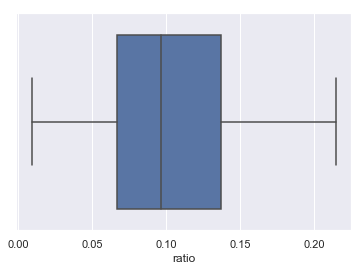

In [610]:
sns.boxplot(x=ratio_not_wide["ratio"])

##### Grote kans dat deze ratio een invloed heeft op mensen hun aandachtsspan. 

In [622]:
ratio_not_wide.to_excel("ratio_not_wide.xlsx")

Deze ratio gaat meer over Visual Reaction span. Eerder dan rond multitasking

## RT op notificatie 

In [611]:
### ### ### ### ### ### ### ### ### 
### ###     Notificatie     ### ###
### ### ### ### ### ### ### ### ###

notif = pd.read_csv('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_notifications.csv', sep = ';', parse_dates=['time'])

In [612]:
notif['application'] = notif['application'].astype("category")
notif['data_version'] = notif['data_version'].astype("category")
df_notif = df[df.notification == True]
notif = notif[notif.posted == True]
notif = notif.sort_values('time', ascending=False)
df_notif.reset_index()
df_notif = df_notif.sort_values('startTime', ascending=False)

In [613]:
def findNotif(row):
    app = row.application
    start = row.startTime
    res = notif[(notif['application'] == app) & (notif['time'] < start)]
    #.reset_index(drop=True)
    res.sort_values('time', ascending=False)
    try:
        max = res['time'].idxmax()
        return res['time'][max]
    except ValueError:
        pass

In [614]:
df_notif['timeNotif'] = df_notif.apply(findNotif, axis=1)

In [615]:
df_notif['reactiesnelheid'] = df_notif['startTime'] - df_notif['timeNotif']
df_notif['reactieSec'] = df_notif.reactiesnelheid / timedelta(seconds=1)
#df_notif[['id', 'application', 'startTime', 'timeNotif', 'reactiesnelheid', 'reactieSec']].to_csv('./data/proximus/test_reactiesnelheid.csv', sep=";")

In [334]:
df_notif['reactiesnelheid']

95471   00:00:00.049000
36282   00:00:02.603000
90246   00:05:35.394000
33824   00:00:01.569000
40056   00:00:01.525000
68531   00:00:03.137000
68530   00:00:02.077000
44689   00:00:00.043000
29341   00:00:31.854000
33821   00:00:06.137000
40055   00:00:00.216000
40054   00:00:07.721000
38521   00:00:05.778000
35483   00:00:20.832000
49641   00:01:23.395000
62615   00:00:04.340000
52678   00:02:50.150000
56493   00:02:49.723000
90533   00:08:29.412000
54137   00:00:56.204000
63638   00:43:34.238000
46168   00:00:52.382000
84209   00:00:12.503000
48274   00:00:00.657000
90531   00:00:00.251000
84384   00:02:57.731000
19448   00:00:05.948000
82493   00:00:44.206000
46167   00:00:00.001000
30666   01:17:04.377000
              ...      
87874   00:00:23.040000
70772   00:00:35.668000
11511   00:00:06.949000
6900    00:02:05.612000
25225   00:07:49.331000
5178    00:45:03.030000
23317   00:05:07.318000
87814   00:17:58.336000
11516   00:03:52.085000
12936   00:03:50.974000
22279   00:00:12

In [616]:
appReacties = df_notif.groupby(['ppn', 'application'])['reactieSec'].mean()
ppnReacties = df_notif.groupby('ppn')['reactieSec'].mean()

In [617]:
ppnReacties = ppnReacties.to_frame().reset_index()

In [618]:
ppnReacties.describe()

,ppn,reactieSec
count,34.000000,34.000000
mean,19.029412,454.269984
std,10.994448,786.594705
min,1.000000,78.983787
25%,10.250000,146.298083
50%,18.500000,290.892410
75%,27.750000,450.078956
max,38.000000,4728.646769


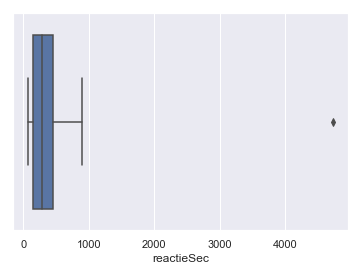

In [619]:
sns.boxplot(x=ppnReacties["reactieSec"])

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


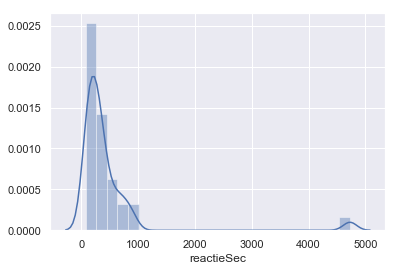

In [621]:
sns.distplot(ppnReacties["reactieSec"])

In [339]:
ppnReacties.to_excel("ppnRT.xlsx")

Gemiddelde reactietijd op notificaties: kans dat wanneer iemand kortere RT heeft ook meer gezien kan worden als een multitasker. 

Interessante getallen om op te slaan. 

In [82]:
appReacties = appReacties.reset_index()
appReacties.sort_values('reactieSec', ascending=False)
appReactiesOut = appReacties[appReacties['reactieSec'] < 10000]
appReactiesOut = appReactiesOut.sort_values('reactieSec', ascending=False).reset_index(drop=True)

###### appReacties toont de apps waarop snel wordt gereageerd per participant. Daardoor kunnen we per participant de top 5 van apps waarop ze snel reageren eruit halen. 

In [92]:
top5Reacties = appReacties.groupby(['ppn','application'])['reactieSec'].nsmallest(5)

In [ ]:
Deze werkt nog niet. 

#### Multitasking maten vergelijken met elkaar: zowel MobileDNA indicaties, als multitasking preference scale (zelfrapportage), als computertaken 

In [351]:
multitasking_tog = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/multitasking.xlsx')

In [353]:
multitasking_tog.head()

,ppn,MobileDNA ID,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,MT,gem_appE/sessie,prop_treintjes,prop_treintjes_3,reactieSec_not
0,1,8a2f0420-8011-4adc-b128-95a40786d765,1.330550,0.975806,71.703924,0.000000,-35410.404725,54.162839,30,2.397933,0.462532,2.521127,899.164740
1,2,a0d70d38-201b-49ad-b700-22d84f037555,1.176528,0.924658,187.927337,0.060000,-12641.706395,26.545730,34,6.866013,0.416667,1.688742,418.887671
2,3,0870854d-f706-4144-bcb4-0ace2e447425,1.204121,0.947368,243.198818,0.003205,-13193.338189,26.906232,31,2.785329,0.423948,2.147541,328.611834
3,4,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,1.158447,0.976190,-5.250477,0.126603,-20813.206677,33.894402,59,3.516513,0.429326,1.457399,112.822895
4,5,c812a99a-59e4-4c5a-a721-0150d42102c6,1.305790,0.973404,113.674637,0.081633,-21785.357181,30.999738,33,2.378665,0.583281,3.945148,319.425170


Er zijn enkele ontbrekende waarden maar eerst proberen om correlatiematrix van de verschillende taken te krijgen zonder die ontbrekende waarden eruit te filteren. 

In [358]:
corrmat = multitasking_tog[["MT", "Prop_RT_SC", "prop_SC_prop", "STR_CE_RT", "STR_CE_ACC", "interceptRT", "slopeRT", "gem_appE/sessie", "prop_treintjes", "prop_treintjes_3", "reactieSec_not"]]

In [359]:
corr = corrmat.corr()

Deze "corr" naar excel zodat je deze kan invoegen in R studio en ook de significantie kan vinden van de waarden in de correlatiematrix. 

In [363]:
corrmat.to_excel("corrmatmult.xlsx")

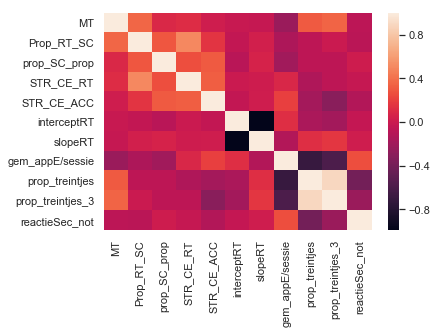

In [360]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [361]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,MT,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,gem_appE/sessie,prop_treintjes,prop_treintjes_3,reactieSec_not
MT,1,0.36,0.096,0.12,0.024,-0.012,-0.018,-0.22,0.31,0.35,-0.072
Prop_RT_SC,0.36,1,0.3,0.51,0.15,-0.04,0.043,-0.14,-0.061,0.00096,-0.08
prop_SC_prop,0.096,0.3,1,0.27,0.31,-0.084,0.06,-0.2,-0.065,-0.06,0.02
STR_CE_RT,0.12,0.51,0.27,1,0.33,0.0005,0.014,0.085,-0.13,-0.058,-0.025
STR_CE_ACC,0.024,0.15,0.31,0.33,1,-0.035,0.021,0.2,-0.18,-0.3,-0.11
interceptRT,-0.012,-0.04,-0.084,0.0005,-0.035,1,-0.99,0.12,-0.15,-0.18,-0.033
slopeRT,-0.018,0.043,0.06,0.014,0.021,-0.99,1,-0.11,0.13,0.17,0.028
gem_appE/sessie,-0.22,-0.14,-0.2,0.085,0.2,0.12,-0.11,1,-0.7,-0.59,0.26
prop_treintjes,0.31,-0.061,-0.065,-0.13,-0.18,-0.15,0.13,-0.7,1,0.9,-0.4
prop_treintjes_3,0.35,0.00096,-0.06,-0.058,-0.3,-0.18,0.17,-0.59,0.9,1,-0.23


### Significante correlaties in multitasking

obv de significante correlaties ook nog eens visueel checken hoe alles eruit ziet. 

##### (1) MT & Prop_RT_SC (task-switching taak):  r = 0.36, p = 0.0229

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


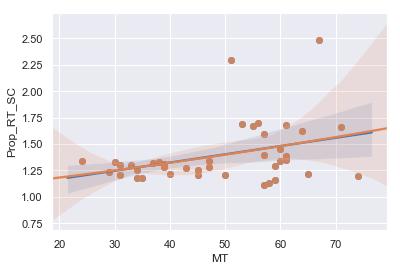

In [364]:
sns.regplot(corrmat["MT"],  corrmat["Prop_RT_SC"]);
sns.regplot(corrmat["MT"],  corrmat["Prop_RT_SC"], order=2)

###### Betekenis: wie dus een hogere multitasking preference heeft, zal ook een proportioneel grotere vertraging vertonen bij mixed tov non-mixed blok. 

##### (2) Prop_RT_SC & STR_CE_RT: r = 0.51, p = 0.0009

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


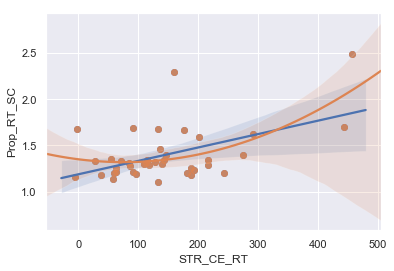

In [365]:
sns.regplot(corrmat["STR_CE_RT"],  corrmat["Prop_RT_SC"]);
sns.regplot(corrmat["STR_CE_RT"],  corrmat["Prop_RT_SC"], order=2)

###### Betekenis (?): wie proportioneel trager reageert op mixed dan op non-mixed blok, zal ook lijden aan een grotere congruentie-effect in de Stroop taak. 

##### (3) interceptRT & slopeRT: r= -0.99, p = 0.000

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


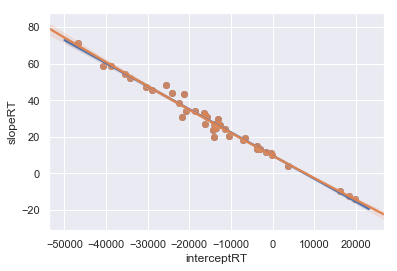

In [366]:
sns.regplot(corrmat["interceptRT"],  corrmat["slopeRT"]);
sns.regplot(corrmat["interceptRT"],  corrmat["slopeRT"], order=2)

###### Kan dit zo perfect zijn? 

##### (4) gem_appE/sessie & prop_treintjes: r = -0.7, p= 0.000

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


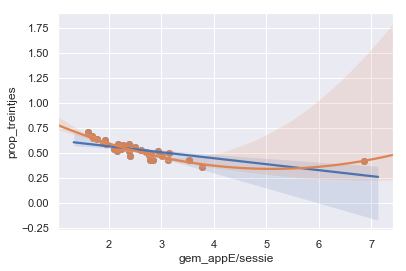

In [367]:
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes"]);
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes"], order=2)

##### (5) MT & prop_treintjes_3: r = 0.35, p = 0.0437

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


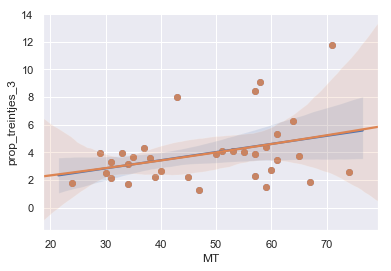

In [368]:
sns.regplot(corrmat["MT"],  corrmat["prop_treintjes_3"]);
sns.regplot(corrmat["MT"],  corrmat["prop_treintjes_3"], order=2)

###### Hoe meer iemand zal aangeven dat ze een multitasking voorkeur hebben, hoe meer single app events er proportioneel voorkwamen vergeleken met meer dan 3 app events in een sessie. 

##### (6) gem_appE/sessie & prop_treintjes_3: r=-0.59, p = 0.0002

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


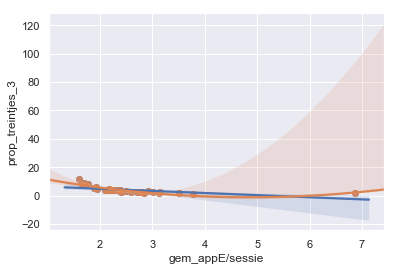

In [370]:
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes_3"]);
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes_3"], order=2)

###### Hoe meer app events iemand vertoonde per sessie, hoe kleiner de proportie treintjes_3 (want meer multiple app events; logisch)

##### (7) prop_treintjes & prop_treintjes_3: r = 0.9, p = 0.0000

###### Logisch dat er hier een correlatie wordt gevonden, aangezien hetzelfde wordt bekeken aan de hand van die proportie, maar dat men een verschil maakt in hoe wordt de proportie wordt berekend. 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


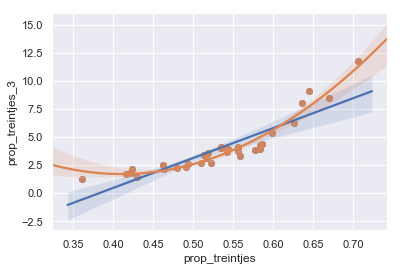

In [371]:
sns.regplot(corrmat["prop_treintjes"],  corrmat["prop_treintjes_3"]);
sns.regplot(corrmat["prop_treintjes"],  corrmat["prop_treintjes_3"], order=2)

##### (8) prop_treintjes & reactieSec_not: r = -0.4, p = 0.0182

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


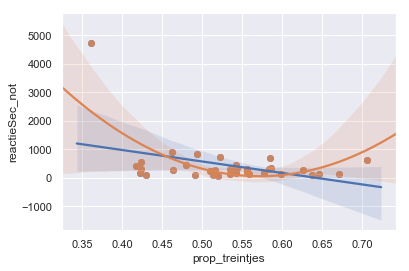

In [372]:
sns.regplot(corrmat["prop_treintjes"],  corrmat["reactieSec_not"]);
sns.regplot(corrmat["prop_treintjes"],  corrmat["reactieSec_not"], order=2)

###### Hoe groter de proportie treintjes, hoe sneller men reageert op een bepaalde notificatie. 

### Is er een verschil in waarden afhankelijk van tot welke groep in MT een participant behoort? 

In [636]:
multitasking_cat = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/multitasking.xlsx")

In [639]:
multitasking_cat.head()

,ppn,MobileDNA ID,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,MT,MT_cat,gem_appE,prop_treintjes_3,reactieSec_not,ratio_startedW,prop_single_app_gr3
0,1,8a2f0420-8011-4adc-b128-95a40786d765,1.330550,0.975806,71.703924,0.000000,-35410.404725,54.162839,30,geen voorkeur om te multitasken,2.397933,2.521127,899.164740,0.078579,0.462532
1,2,a0d70d38-201b-49ad-b700-22d84f037555,1.176528,0.924658,187.927337,0.060000,-12641.706395,26.545730,34,geen voorkeur om te multitasken,6.866013,1.688742,418.887671,0.050190,0.416667
2,3,0870854d-f706-4144-bcb4-0ace2e447425,1.204121,0.947368,243.198818,0.003205,-13193.338189,26.906232,31,geen voorkeur om te multitasken,2.785329,2.147541,328.611834,0.153578,0.423948
3,4,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,1.158447,0.976190,-5.250477,0.126603,-20813.206677,33.894402,59,voorkeur om te multitasken,3.516513,1.457399,112.822895,0.156789,0.429326
4,5,c812a99a-59e4-4c5a-a721-0150d42102c6,1.305790,0.973404,113.674637,0.081633,-21785.357181,30.999738,33,geen voorkeur om te multitasken,2.378665,3.945148,319.425170,0.023049,0.583281


##### (1) prop_RT_SC

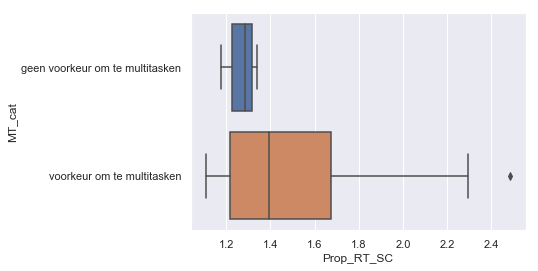

In [626]:
#Create a boxplot
sns.boxplot(x="Prop_RT_SC", y="MT_cat", data=multitasking_cat)

In [628]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [629]:
 mod = ols('Prop_RT_SC ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df         F    PR(>F)
MT_cat    0.556091   1.0  8.054167  0.007246
Residual  2.623669  38.0       NaN       NaN


In [630]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Prop_RT_SC   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     8.054
Date:                Thu, 27 Dec 2018   Prob (F-statistic):            0.00725
Time:                        21:17:17   Log-Likelihood:                -2.2714
No. Observations:                  40   AIC:                             8.543
Df Residuals:                      38   BIC:                             11.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.2707      0.060     21.079      0.000       1.149       1.393
MT_cat[T.voorkeur om te multitasken]     0.2361      0.083      2.838      0.007       0.068       0.405
==============================================================================
Omnibus:                       28.402   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.826
Skew:                           1.778   Prob(JB):                     8.38e-15
Kurtosis:                       8.123   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Significant verschil tussen de proportie in switching en mixing cost. Wie een voorkeur heeft om te multitasken zal ook gemiddeld meer vertraging vertonen in mixed block tov non-mixed blok. 

##### (2) prop_SC_prop

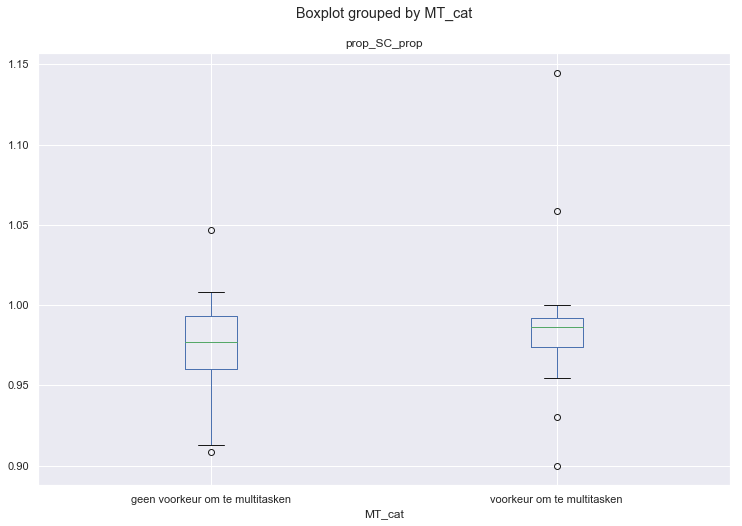

In [380]:
#Create a boxplot
multitasking_cat.boxplot('prop_SC_prop', by='MT_cat', figsize=(12, 8))

In [381]:
 mod = ols('prop_SC_prop ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df        F    PR(>F)
MT_cat    0.001811   1.0  1.06482  0.308642
Residual  0.064621  38.0      NaN       NaN


geen significant verschil. 

##### (3) STR_CE_RT

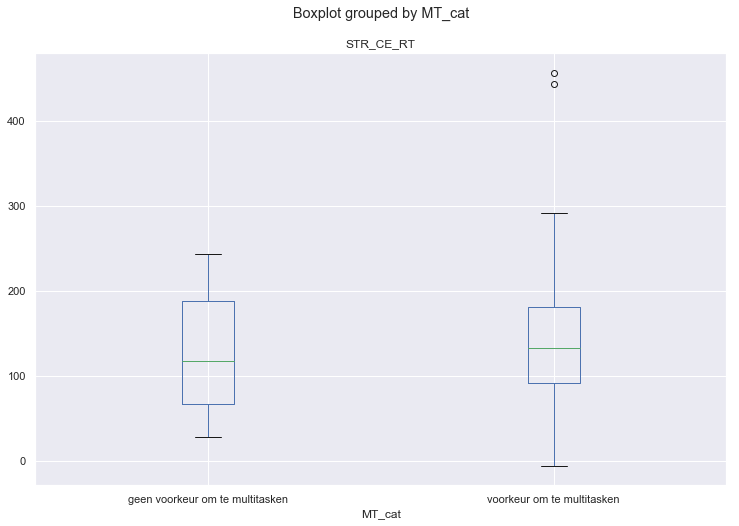

In [382]:
#Create a boxplot
multitasking_cat.boxplot('STR_CE_RT', by='MT_cat', figsize=(12, 8))

In [383]:
 mod = ols('STR_CE_RT ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                 sum_sq    df         F    PR(>F)
MT_cat     11319.018508   1.0  1.144486  0.291455
Residual  375821.812166  38.0       NaN       NaN


Geen significant verschil tussen beide groepen. 

##### (4) STR_CE_ACC

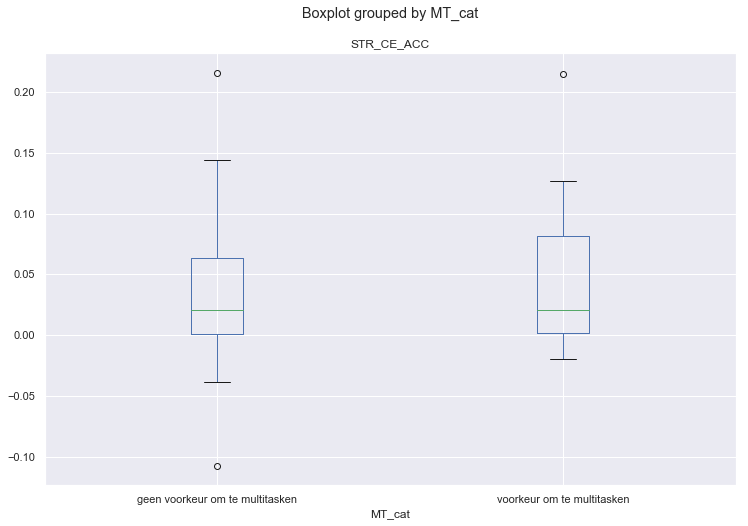

In [385]:
#Create a boxplot
multitasking_cat.boxplot('STR_CE_ACC', by='MT_cat', figsize=(12, 8))

##### (5) interceptRT

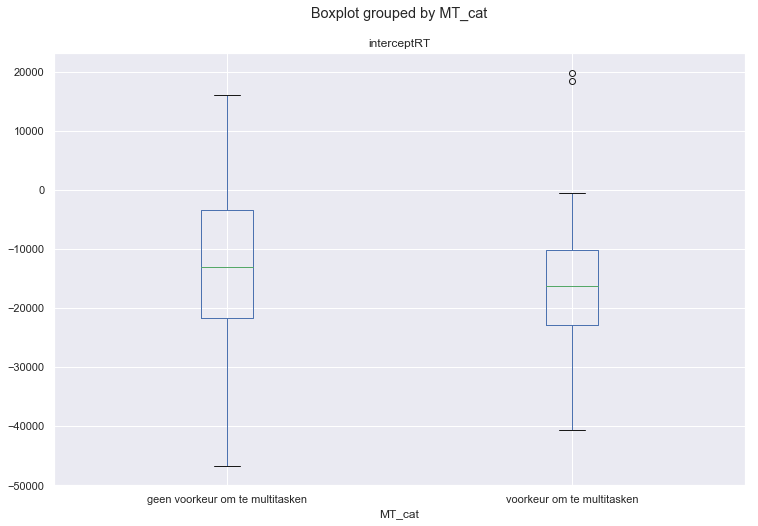

In [386]:
#Create a boxplot
multitasking_cat.boxplot('interceptRT', by='MT_cat', figsize=(12, 8))

In [387]:
 mod = ols('interceptRT ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                sum_sq    df         F    PR(>F)
MT_cat    1.674143e+07   1.0  0.071662  0.790419
Residual  8.643838e+09  37.0       NaN       NaN


##### (6) slopeRT

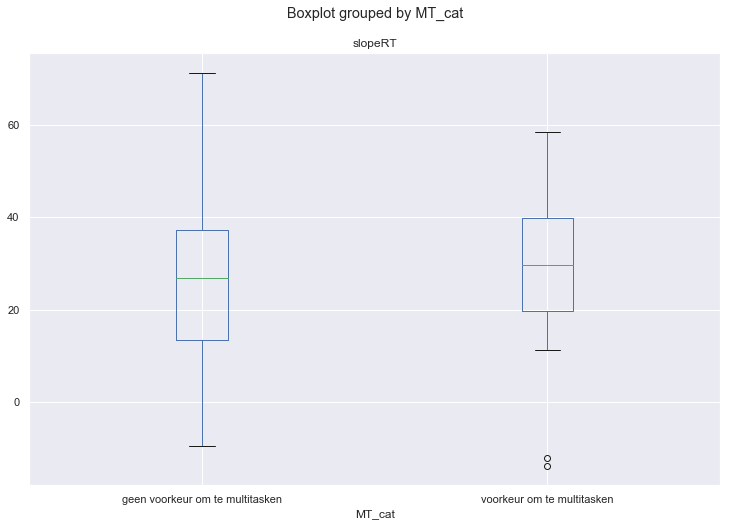

In [388]:
#Create a boxplot
multitasking_cat.boxplot('slopeRT', by='MT_cat', figsize=(12, 8))

##### (7) gem_appE/sessie

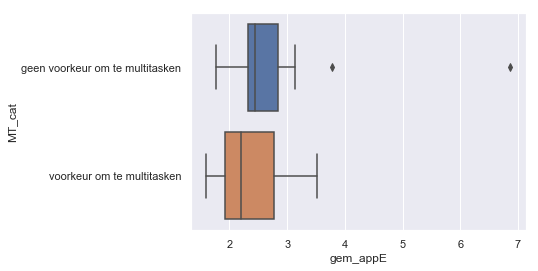

In [637]:
#Create a boxplot
sns.boxplot(x='gem_appE', y="MT_cat", data=multitasking_cat)

In [638]:
 mod = ols('gem_appE ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

             sum_sq    df         F    PR(>F)
MT_cat     2.179057   1.0  2.707735  0.109652
Residual  25.752094  32.0       NaN       NaN


##### (8) prop_treintjes

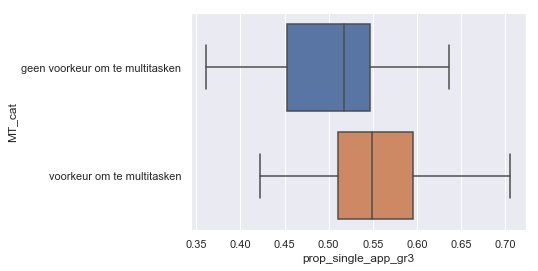

In [640]:
#Create a boxplot
sns.boxplot(x='prop_single_app_gr3', y="MT_cat", data=multitasking_cat)

In [641]:
 mod = ols('prop_single_app_gr3 ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df         F    PR(>F)
MT_cat    0.023763   1.0  4.206667  0.048528
Residual  0.180761  32.0       NaN       NaN


hier krijgen we dus een significant verschil in prop treintjes; waarbij die proportie hoger zal zijn indien iemand een hogere voorkeur heeft om te multitasken. 

##### (9) prop_treintjes_3

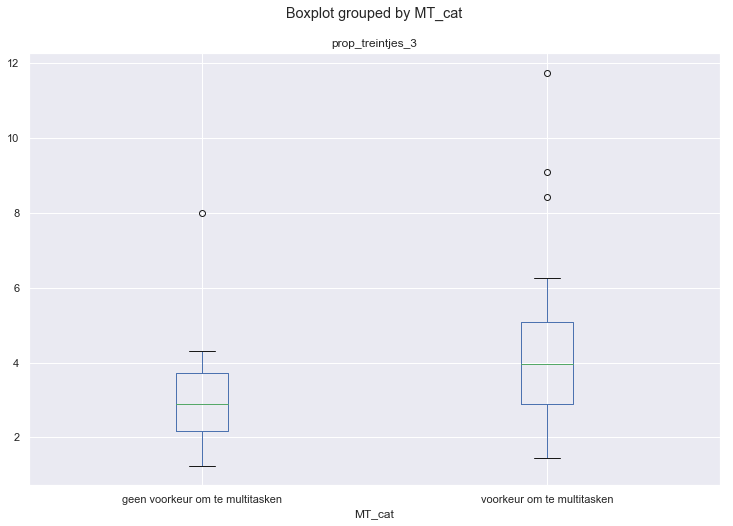

In [392]:
#Create a boxplot
multitasking_cat.boxplot('prop_treintjes_3', by='MT_cat', figsize=(12, 8))

In [393]:
 mod = ols('prop_treintjes_3 ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

              sum_sq    df         F    PR(>F)
MT_cat     18.634281   1.0  3.696504  0.063466
Residual  161.313778  32.0       NaN       NaN


##### (10) reactieSec_not

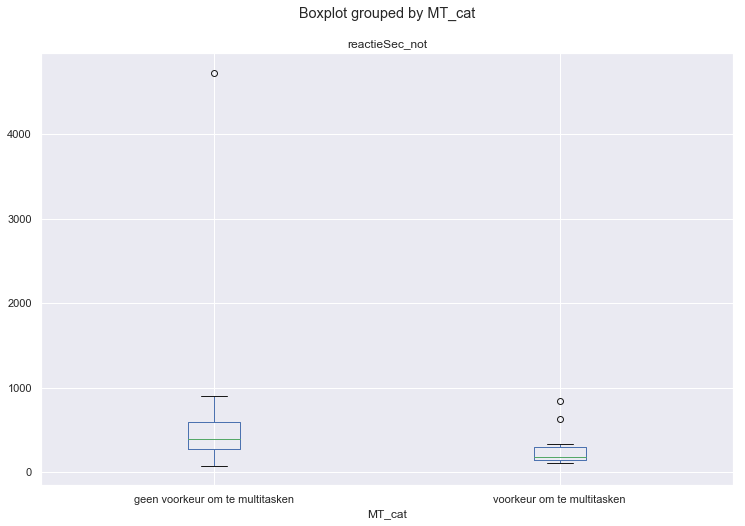

In [394]:
#Create a boxplot
multitasking_cat.boxplot('reactieSec_not', by='MT_cat', figsize=(12, 8))

In [395]:
 mod = ols('reactieSec_not ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                sum_sq    df         F    PR(>F)
MT_cat    1.488552e+06   1.0  2.516361  0.122504
Residual  1.892958e+07  32.0       NaN       NaN


##### (11) ratio_startedW

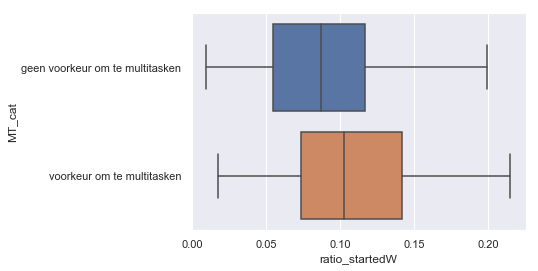

In [642]:
sns.boxplot(x='ratio_startedW', y="MT_cat", data=multitasking_cat)

In [643]:
 mod = ols('ratio_startedW ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df        F    PR(>F)
MT_cat    0.002958   1.0  1.01691  0.320818
Residual  0.093075  32.0      NaN       NaN


In [644]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ratio_startedW   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.017
Date:                Thu, 27 Dec 2018   Prob (F-statistic):              0.321
Time:                        21:33:44   Log-Likelihood:                 52.068
No. Observations:                  34   AIC:                            -100.1
Df Residuals:                      32   BIC:                            -97.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0922      0.013      6.840      0.000       0.065       0.120
MT_cat[T.voorkeur om te multitasken]     0.0187      0.019      1.008      0.321      -0.019       0.056
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.199
Skew:                           0.369   Prob(JB):                        0.549
Kurtosis:                       2.452   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""